# Packages & libraries

We report here all the necessary packages and libraries.

In [1]:
# dataframes
import pandas as pd
# numpy
import numpy as np
# plots
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
import seaborn as sns
sns.set(font = "serif", style = "whitegrid", palette = "deep", font_scale = 0.75)
# ml tools
from statsmodels.compat import lzip
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.cross_decomposition  import PLSRegression
# regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# poly regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# smoothing spline
from pygam import LinearGAM, s
from functools import reduce
# decision tree
from sklearn.tree import DecisionTreeRegressor
# random forests
from sklearn.ensemble import RandomForestRegressor
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
# svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# nn
#import torch
#import torch.nn as nn
#import torch.optim as optim

ModuleNotFoundError: No module named 'pygam'

# Data preprocessing 

Let's do some preliminary analysis.

### sales
1. dimensions of the dataset;
2. data cleaning 	
	1. remove the empty columns and rows;
	2. check for null columns (each entry is `NaN`) / check for null rows;
	3. check types;
	4. `date`:
		- check range;
	5. `is_open`:
		- check is composed by `YES` and `NO` only;
		- edit the exeptions; 
	6. `sales_amount`: 
		- impose `if is_open == "NO" then sales_amount = 0` (and fix exeptions);
		- check if all values are non-negative (NO!);
		- edit negatives and `NaN`;

### market
1. dimensions of the dataset;
2. data cleaning 	
	1. remove the empty columns and rows;
	2. check for null columns (each entry is `NaN`) / check for null rows;
	3. check types;
	4. `id`:
		- unique identifier;
	5. `market_type`:
		- check is composed by correct labels;
	6. `squere_feet`: 
		- check positive; 
	5. `market_type`:
      	- solve `NaN` values;
	6. `avg_customer`: 
		- check positive (and correct);
		- set integer;
	7. `competitor_distance`: 
        - check positive;
	8. `has_promotions`:
		- check is composed by `YES` and `NO` only;

Let us first display each dataset and check the number of rows and columns.

In [3]:
sales = pd.read_csv("data/sales.csv")
display(sales)

market_id        date is_open  sales_amount    
0           XC14  31/12/2022     YES      55727.34 NaN
1           WG25  31/12/2022     YES      12984.10 NaN
2           UX72  31/12/2022     YES      13046.56 NaN
3           EE84  31/12/2022     YES      60916.76 NaN
4           RF54  31/12/2022     YES      12376.42 NaN
...          ...         ...     ...           ...  ..
523944      ZM74  01/01/2021     YES      21553.84 NaN
523945      WW60  01/01/2021     YES      56371.18 NaN
523946      LU14  01/01/2021     YES      24107.19 NaN
523947      HY57  01/01/2021     YES      12257.38 NaN
523948      QD17  01/01/2021     YES      28068.53 NaN

[523949 rows x 5 columns]

In [4]:
n_rows_sales = sales.shape[0]
n_cols_sales = sales.shape[1]
print("the number of rows is " + str(n_rows_sales) + " while the number of columns is " + str(n_cols_sales))

the number of rows is 523949 while the number of columns is 5


In [5]:
market = pd.read_csv("data/market.csv")
display(market)

id country  Unnamed: 2 market_type  square_feet  avg_customers  \
0    XC14   SPAIN         NaN       HYPER        11135          773.0   
1    WG25  FRANCE         NaN        MINI         1402          252.0   
2    UX72  FRANCE         NaN        MINI         1452          265.0   
3    EE84   SPAIN         NaN       HYPER        15259          874.0   
4    RF54  FRANCE         NaN        MINI         2497          191.0   
..    ...     ...         ...         ...          ...            ...   
745  ZM74   ITALY         NaN       SUPER         5778          356.0   
746  WW60  FRANCE         NaN       HYPER        10923          907.0   
747  LU14   ITALY         NaN       SUPER         5742          397.0   
748  HY57   ITALY         NaN        MINI         2495          228.0   
749  QD17  FRANCE         NaN       SUPER         6806          516.0   

     competitor_distance has_promotions  
0                    515            YES  
1                    522            YES  
2                  15939            YES  
3                    754            YES  
4                  34007            YES  
..                   ...            ...  
745                 4424            YES  
746                41359            YES  
747                 2841            YES  
748                 3848            YES  
749                10468            YES  

[750 rows x 8 columns]

In [6]:
n_rows_market = market.shape[0]
n_cols_market = market.shape[1]
print("the number of rows is " + str(n_rows_market) + " while the number of columns is " + str(n_cols_market))

the number of rows is 750 while the number of columns is 8


The first thing to notice is that both datasets seem to contain a Nan column. We will take care of it in the following section together with any possible error.

## Data cleaning

We clean here the datasets separately:

### Sales dataset

We first remove any empty column or row.

In [7]:
# remove empty colums
sales = sales.dropna(axis = 1, how = "all")
n_cols_sales = sales.shape[1]

# remove empty rows
sales = sales.dropna(axis = 0, how = "all")
n_rows_sales = sales.shape[0]
	
display(sales)

market_id        date is_open  sales_amount
0           XC14  31/12/2022     YES      55727.34
1           WG25  31/12/2022     YES      12984.10
2           UX72  31/12/2022     YES      13046.56
3           EE84  31/12/2022     YES      60916.76
4           RF54  31/12/2022     YES      12376.42
...          ...         ...     ...           ...
523944      ZM74  01/01/2021     YES      21553.84
523945      WW60  01/01/2021     YES      56371.18
523946      LU14  01/01/2021     YES      24107.19
523947      HY57  01/01/2021     YES      12257.38
523948      QD17  01/01/2021     YES      28068.53

[523948 rows x 4 columns]

We now check for Nan values: we first count the total number of Nan and then display the number of Nan values for each column.

In [8]:
n_nan = sales.isnull().sum().sum()
print("the total number of NaN is " + str(n_nan) + "\n")

print("the number of NaN in each column of sales is:")
for index in range(0, n_cols_sales):
	col = sales.iloc[:, index]
	n_nan_col = col.isnull().sum().sum()
	print("- " + sales.columns[index] + " = " + str(n_nan_col))

the total number of NaN is 14

the number of NaN in each column of sales is:
- market_id = 0
- date = 0
- is_open = 0
- sales_amount = 14


As we can see all the Nan values are in the sales_amount column. Before deciding how to solve them, let us search for errors in the other three columns.

Let us first make sure that the data type of each column matches the one we want, that is string, date, string and float respectively.

In [9]:
sales.dtypes

market_id        object
date             object
is_open          object
sales_amount    float64
dtype: object

The only adjustment we need to do here is to transform the values in the date column from strings to datetime. We do it below and we also check that all the dates range from 01/01/2021 to 31/12/2022.

In [10]:
sales["date"] = pd.to_datetime(sales["date"], format = "%d/%m/%Y")
start_date = "01/01/2021"
end_date = "31/12/2022"

# boolean panda's series: True if the date is acceptable (inside the range), False otherwise
check_date_range = sales["date"].between(start_date, end_date)

n_date_out_of_range = n_rows_sales - check_date_range.sum()
print("the number of dates out of range is " + str(n_date_out_of_range))

the number of dates out of range is 0


C:\Users\eleon\AppData\Local\Temp\ipykernel_11736\3952559270.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  check_date_range = sales["date"].between(start_date, end_date)


We now make sure that the is_open column has no string different from YES or NO.

In [10]:
# boolean panda's series: True if is_open is acceptable ("YES" or "NO"), False otherwise
check_is_open = sales[~sales["is_open"].isin(["YES", "NO"])].index
print("the rows with no YES or NO in is_open are: " + str(list(check_is_open)))

display(sales.loc[check_is_open, :])

the rows with no YES or NO in is_open are: [49154]


market_id       date is_open  sales_amount
49154      BT51 2022-10-14    YESS      25220.48

There is a single row with uncorrect value for is_open. Since here the value is YESS, we assume it is a typing error and we correct it as YES.

In [11]:
sales.loc[check_is_open[0], "is_open"] = "YES"

Let us now look at the sales_amount column. We first control if the following condition is met: if is_open is equal to NO, then sales_amount has to be equal to 0. 

In [15]:
# sales dataframe restricted to the condition is_open == "NO" with non-acceptable sales_amounts (!= 0)
sales_amount_no_error = sales[(sales["is_open"] == "NO") & (sales["sales_amount"] != 0)]
print("indexes where is_open is NO and sales_amount is not 0: " + str(list(sales_amount_no_error.index)))
sales.loc[sales_amount_no_error.index, "sales_amount"] = 0

indexes where is_open is NO and sales_amount is not 0: [753]


There is only one row in which the above condition is not met. We correct the error by setting sales_amount equal to 0.

We now look for possible negative values.

In [13]:
# sales dataframe restricted to the condition sales_amounts < 0
sales_amount_negative = sales[sales["sales_amount"] < 0]
sales_amount_negative

market_id       date is_open  sales_amount
47528      XC14 2022-10-16     YES     -999999.0
48150      XC14 2022-10-15     YES     -999999.0
48772      XC14 2022-10-14     YES     -999999.0
49394      XC14 2022-10-13     YES     -999999.0
50016      XC14 2022-10-12     YES     -999999.0
50638      XC14 2022-10-11     YES     -999999.0

As we can see, there are some negative values. We decide to solve both negative and Nan values by replacing them with the mean daily sales of the corresponding market.

Note: Of course there are other possibilities for solving the error. For example one could also replace them with the mean sales over the corresponding date of the markets of the same type and in the same country.

In [14]:
# sales dataframe restricted to the rows with non-acceptable sales_amounts (NaN or negative values)
sales_amount_error = sales[sales["sales_amount"].isnull() | (sales["sales_amount"] < 0)]
display(sales_amount_error)

# dataframe containing the market_id's and their correspondent mean sales_amount
mean_sales_amount = (sales[(sales["sales_amount"] > 0)].groupby("market_id"))["sales_amount"].mean()

# correcting errors
for index, row in (sales.loc[sales_amount_error.index]).iterrows():
	sales.loc[index, "sales_amount"] = mean_sales_amount[row["market_id"]]
# portion of the dataframe corrected
sales.loc[sales_amount_error.index]

market_id       date is_open  sales_amount
98          OG21 2022-12-31     YES           NaN
47528       XC14 2022-10-16     YES     -999999.0
48150       XC14 2022-10-15     YES     -999999.0
48772       XC14 2022-10-14     YES     -999999.0
49394       XC14 2022-10-13     YES     -999999.0
50016       XC14 2022-10-12     YES     -999999.0
50638       XC14 2022-10-11     YES     -999999.0
174088      UF73 2022-04-12     YES           NaN
223239      BY57 2022-02-05     YES           NaN
509998      NL22 2021-01-19     YES           NaN
509999      QX97 2021-01-19     YES           NaN
510000      AB90 2021-01-19     YES           NaN
510001      KR60 2021-01-19     YES           NaN
510002      SF72 2021-01-19     YES           NaN
510003      SY36 2021-01-19     YES           NaN
510004      FH27 2021-01-19     YES           NaN
510005      HJ11 2021-01-19     YES           NaN
510006      OA13 2021-01-19     YES           NaN
510007      TX18 2021-01-19     YES           NaN
510008      CI77 2021-01-19     YES           NaN

market_id       date is_open  sales_amount
98          OG21 2022-12-31     YES  62768.862528
47528       XC14 2022-10-16     YES  60603.900400
48150       XC14 2022-10-15     YES  60603.900400
48772       XC14 2022-10-14     YES  60603.900400
49394       XC14 2022-10-13     YES  60603.900400
50016       XC14 2022-10-12     YES  60603.900400
50638       XC14 2022-10-11     YES  60603.900400
174088      UF73 2022-04-12     YES  12005.331014
223239      BY57 2022-02-05     YES  12628.222322
509998      NL22 2021-01-19     YES  12017.349917
509999      QX97 2021-01-19     YES  12467.709522
510000      AB90 2021-01-19     YES  26124.283769
510001      KR60 2021-01-19     YES  11123.656971
510002      SF72 2021-01-19     YES  12557.663558
510003      SY36 2021-01-19     YES  57956.421653
510004      FH27 2021-01-19     YES  12520.668233
510005      HJ11 2021-01-19     YES  12355.999983
510006      OA13 2021-01-19     YES  12543.885878
510007      TX18 2021-01-19     YES  23315.179071
510008      CI77 2021-01-19     YES  12397.399425

### Market dataset

As we did for the previous dataset, we remove any empty column or row.

In [15]:
# remove empty colums
market = market.dropna(axis = 1, how = "all")
n_cols_market = market.shape[1]

# remove empty rows
market = market.dropna(axis = 0, how = "all")
n_rows_market = market.shape[0]
	
display(market)

id country market_type  square_feet  avg_customers  \
0    XC14   SPAIN       HYPER        11135          773.0   
1    WG25  FRANCE        MINI         1402          252.0   
2    UX72  FRANCE        MINI         1452          265.0   
3    EE84   SPAIN       HYPER        15259          874.0   
4    RF54  FRANCE        MINI         2497          191.0   
..    ...     ...         ...          ...            ...   
745  ZM74   ITALY       SUPER         5778          356.0   
746  WW60  FRANCE       HYPER        10923          907.0   
747  LU14   ITALY       SUPER         5742          397.0   
748  HY57   ITALY        MINI         2495          228.0   
749  QD17  FRANCE       SUPER         6806          516.0   

     competitor_distance has_promotions  
0                    515            YES  
1                    522            YES  
2                  15939            YES  
3                    754            YES  
4                  34007            YES  
..                   ...            ...  
745                 4424            YES  
746                41359            YES  
747                 2841            YES  
748                 3848            YES  
749                10468            YES  

[750 rows x 7 columns]

We now check for Nan values: again, we first count the total number of Nan and then display the number of Nan values for each column.

In [16]:
n_nan = market.isnull().sum().sum()
print("the total number of NaN is " + str(n_nan) + "\n")

print("the number of NaN in each column of market is:")
for index in range(0, n_cols_market):
	col = market.iloc[:, index]
	n_nan_col = col.isnull().sum().sum()
	print("- " + market.columns[index] + " = " + str(n_nan_col))

the total number of NaN is 3

the number of NaN in each column of market is:
- id = 0
- country = 0
- market_type = 2
- square_feet = 0
- avg_customers = 1
- competitor_distance = 0
- has_promotions = 0


Before solving the Nan values, let us first check the column types: we want them to be respectively string, string, string, integer, integer, intger, string.

In [17]:
market.dtypes

id                      object
country                 object
market_type             object
square_feet              int64
avg_customers          float64
competitor_distance      int64
has_promotions          object
dtype: object

Only the avg_costumers column has uncorrect type: float instead of int. It is possible to check that this is due only to the presence in the column of a Nan value. We will convert the column from float to int later, after having fixed the Nan value.

We now look at each column separately and solve any error we encounter. We start from the id column, for which the only thing to check is that their values are unique.

In [18]:
print("the market id's are unique:", len(market) == len(pd.unique(market["id"])))

the market id's are unique: True


We now check that the market_type column only contains the strings MINI, SUPER and HYPER.

In [19]:
# boolean panda's series: True if market_type is acceptable ("MINI", "SUPER" or "HYPER"), False otherwise
check_market_type = market[~market["market_type"].isin(["MINI", "SUPER", "HYPER"])].index
print("the rows with non correct labels are: " + str(list(check_market_type)))

display(market.loc[check_market_type, :])

the rows with non correct labels are: [90, 225]


id country market_type  square_feet  avg_customers  \
90   RU30   SPAIN         NaN        14305          637.0   
225  KB10   ITALY         NaN         1520          150.0   

     competitor_distance has_promotions  
90                  1701            YES  
225                  479            YES

As we can see, there are two Nan values. We decide to substitute them with the market type corresponding to the most similar market_type in the same country, where with most similar we mean in terms of average square_feet. That is, we compare the square_feet value of the above rows with the mean square feet of mini, super and hyper markets in Spain and Italy respectively, and then we pick the market type of the closest one. <br>
Before doing so, we need to check that all the values in the square_feet column are positive.

In [20]:
# boolean panda's series: True if square_feet is positive, False otherwise
check_square_feet = market[market["square_feet"] <= 0].index
print("the rows with negative square_feet are: " + str(list(check_square_feet)))

the rows with negative square_feet are: []


In [21]:
# market without uncorrect market_type 
market_correct = market.iloc[~market.index.isin(check_market_type)]

# dataframe containing the country, the market_type and their correspondent mean square_feet
mean_sqfeet_bycountry = (market_correct.groupby(["country", "market_type"]))["square_feet"].mean()
display(pd.DataFrame(mean_sqfeet_bycountry))

square_feet
country market_type              
FRANCE  HYPER        12153.225806
        MINI          1998.402778
        SUPER         6035.285714
ITALY   HYPER        12052.172414
        MINI          2054.526786
        SUPER         6067.655172
SPAIN   HYPER        12063.774194
        MINI          1978.367089
        SUPER         6079.606061

Note: Notice that the average sqare feet of mini, super and hyper markets separately are quite similar over the countries.

In [22]:
# correcting errors
for index, row in market.loc[check_market_type, :].iterrows():
	# panda's series with the square_feet means with respect to market_type in the country row["country"]
	mean_sqfeet_country = mean_sqfeet_bycountry[row["country"]]
	# closest square_feet value within the previous pandas series
	closest_sqfeet = min(mean_sqfeet_country, key = lambda x: abs(row["square_feet"] - x))
	# corresponding market_type
	closest_market_type = (mean_sqfeet_country[mean_sqfeet_country == closest_sqfeet]).index[0]
	# assigning the market_type
	market.loc[index, "market_type"] = closest_market_type

# corrected rows
display(market.loc[check_market_type, :])

id country market_type  square_feet  avg_customers  \
90   RU30   SPAIN       HYPER        14305          637.0   
225  KB10   ITALY        MINI         1520          150.0   

     competitor_distance has_promotions  
90                  1701            YES  
225                  479            YES

Note: Even if not necessary (as the wrong values here are only two), we decided to run a for loop above in order to maintain the code more general and reusable. In other contexts one could have hundreds or even thousands of wrong/missing values.

The next column to check is avg_costumers: we search for negative or Nan values and we substitute them with the mean avg_costumers of the same type of market in the same country.

In [23]:
# boolean panda's series: True if avg_customers is acceptable (not NaN or negative), False otherwise
check_avg_customers = market[market["avg_customers"].isnull() | (market["avg_customers"] < 0)].index
print("the rows with non acceptable values are: " + str(list(check_avg_customers)))

display(market.loc[check_avg_customers, :])

the rows with non acceptable values are: [69, 626]


id country market_type  square_feet  avg_customers  \
69   IP89   SPAIN       HYPER        15560        -9999.0   
626  OD40   ITALY       HYPER        14157            NaN   

     competitor_distance has_promotions  
69                  6281            YES  
626                 3519            YES

In [24]:
market_correct = market.iloc[~market.index.isin(check_avg_customers)]
mean_avgcust_bycountry = (market_correct.groupby(["country", "market_type"]))["avg_customers"].mean()
display(pd.DataFrame(mean_avgcust_bycountry))

for index, row in market.loc[check_avg_customers, :].iterrows():
	market.loc[index, "avg_customers"] = mean_avgcust_bycountry[row["country"]][row["market_type"]]

display(market.loc[check_avg_customers, :])

avg_customers
country market_type               
FRANCE  HYPER           688.258065
        MINI            210.527778
        SUPER           401.396825
ITALY   HYPER           733.785714
        MINI            208.646018
        SUPER           401.293103
SPAIN   HYPER           763.483871
        MINI            214.329114
        SUPER           405.333333

id country market_type  square_feet  avg_customers  \
69   IP89   SPAIN       HYPER        15560     763.483871   
626  OD40   ITALY       HYPER        14157     733.785714   

     competitor_distance has_promotions  
69                  6281            YES  
626                 3519            YES

Note: As it happens above for the average square feet, also here the average avg_costumers of mini, super and hyper markets separately are quite similar over the countries.

Finally, we round the new values and then turn the type of the avg_costumers column from float to int.

In [25]:
market["avg_customers"] = market["avg_customers"].round().astype('int')
display(market.loc[check_avg_customers, :])

id country market_type  square_feet  avg_customers  \
69   IP89   SPAIN       HYPER        15560            763   
626  OD40   ITALY       HYPER        14157            734   

     competitor_distance has_promotions  
69                  6281            YES  
626                 3519            YES

Let us now check the last two columns: we want that all the values in the competitor_distance column are nonnegative and that the has_promotion column only contains the strings YES and NO. Notice that in the competitor_distance column the value 0 is acceptable since it can happen that two competitor markets are pretty close to each other.

In [26]:
# boolean panda's series: True if competitor_distance is positive, False otherwise
check_competitor_distance = market[market["competitor_distance"] <= 0].index
print("the rows with negative competitor_distance are: " + str(list(check_square_feet)))

the rows with negative competitor_distance are: []


In [27]:
# boolean panda's series: True if has_promotions is acceptable ("YES" or "NO"), False otherwise
check_has_promotions = market[~market["has_promotions"].isin(["YES", "NO"])].index
print("the rows with non correct values are: " + str(list(check_has_promotions)))

# display(market.loc[check_has_promotions, :])

the rows with non correct values are: []


## Dataset generation

collapse temporal information of sales

In [28]:
sales["is_open"] = sales["is_open"].map({"YES": 1, "NO": 0})
is_open = sales.groupby("market_id")["is_open"].mean().reset_index()
sales_amount = sales[sales["is_open"] == 1].groupby("market_id")["sales_amount"].mean().reset_index()
sales = pd.merge(is_open, sales_amount, on = "market_id")
display(sales)

market_id   is_open  sales_amount
0        AA39  0.827397  12609.579520
1        AA82  0.820513  26573.814219
2        AB90  0.830137  26124.283769
3        AC71  0.820513  11856.326518
4        AD13  0.824658  12392.551096
..        ...       ...           ...
745      ZX46  0.830137  12570.549505
746      ZX76  0.820513  12375.246473
747      ZY62  0.827397  26404.851308
748      ZZ11  0.818681  12542.256577
749      ZZ13  0.832877  12427.376908

[750 rows x 3 columns]

merge datasets

In [29]:
merged_df = pd.merge(sales, market, left_on = "market_id", right_on = "id", how = "left").drop(["market_id", "id"], axis = 1)
merged_df

is_open  sales_amount country market_type  square_feet  avg_customers  \
0    0.827397  12609.579520  FRANCE        MINI         2437            248   
1    0.820513  26573.814219  FRANCE       SUPER         6403            493   
2    0.830137  26124.283769  FRANCE       SUPER         7544            340   
3    0.820513  11856.326518   SPAIN        MINI         1940            165   
4    0.824658  12392.551096  FRANCE        MINI         1486            166   
..        ...           ...     ...         ...          ...            ...   
745  0.830137  12570.549505  FRANCE        MINI         1691            272   
746  0.820513  12375.246473  FRANCE        MINI         1462            159   
747  0.827397  26404.851308  FRANCE       SUPER         5946            488   
748  0.818681  12542.256577  FRANCE        MINI         1413            239   
749  0.832877  12427.376908  FRANCE        MINI         2144            188   

     competitor_distance has_promotions  
0                     58            YES  
1                    300            YES  
2                   1598            YES  
3                   2068            YES  
4                    750            YES  
..                   ...            ...  
745                 1843            YES  
746                  547            YES  
747                 2743            YES  
748                 1920            YES  
749                 6811            YES  

[750 rows x 8 columns]

## Data visualization & categorical variables encoding

### Boxplots & countplots

boxplots of quantitative variables

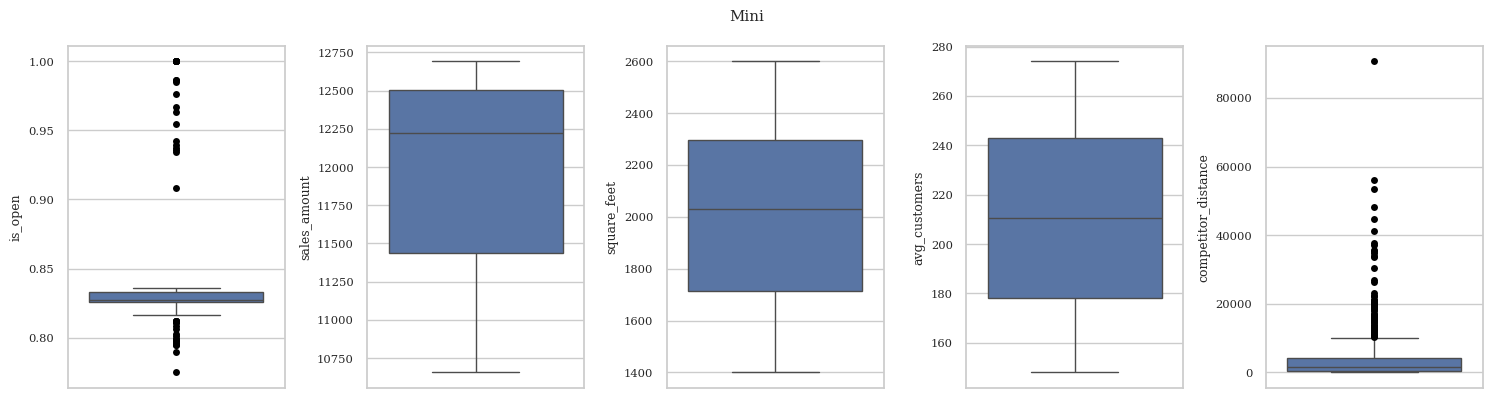

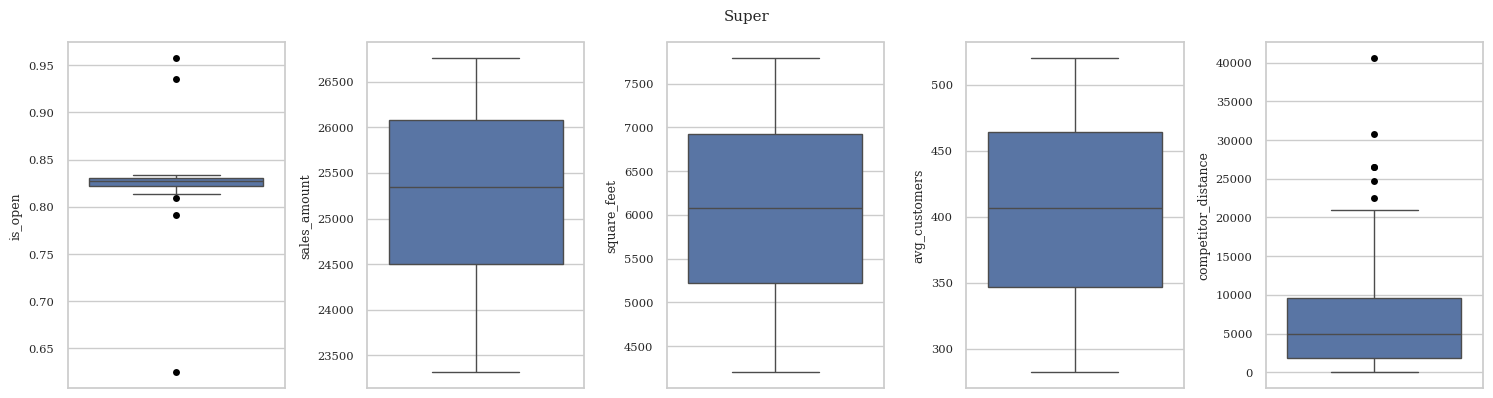

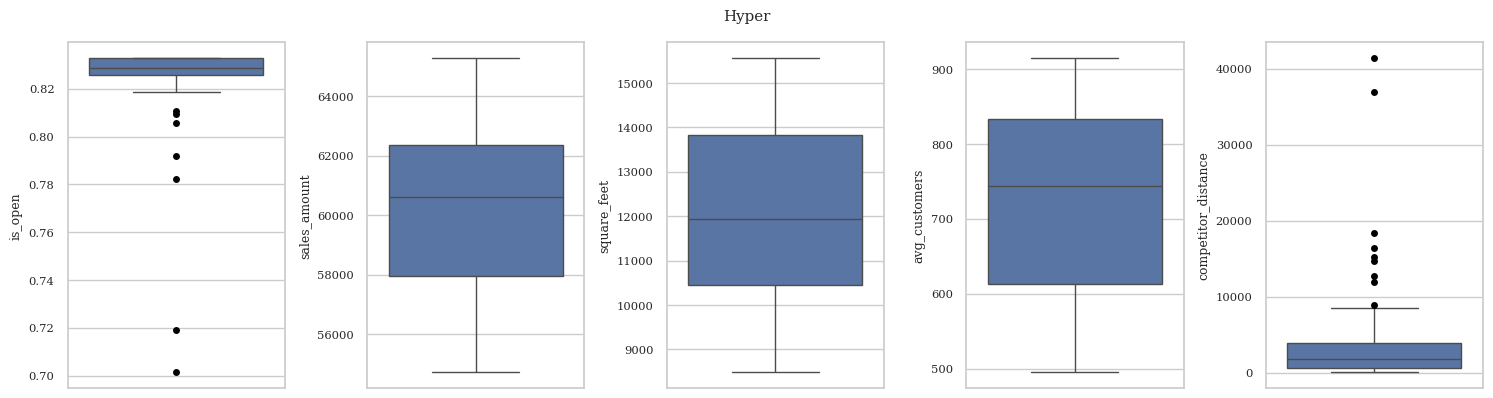

In [30]:
quant_names = ["is_open", "sales_amount", "square_feet", "avg_customers", "competitor_distance"]
for market_type in pd.unique(merged_df["market_type"]):
	merged_df_mt = merged_df[merged_df["market_type"] == market_type]

	fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize = (15, 4))
	ax = ax.flatten()
	index = 0
	for col_name in quant_names:
		sns.boxplot(y = col_name, data = merged_df_mt, ax = ax[index],
			flierprops = {"marker": ".", "markersize": 10, "markerfacecolor": "black", "markeredgecolor": "none"})
		index += 1
	fig.suptitle(market_type.title())
	plt.tight_layout()
	plt.show()

It seems there are some outliers, let's see the outlier percentage per column. <br>
To check outliers (before fitting the model), one standard approach is to compute the `iqr` (interquartile range) and then check values that are:
- lower than $\text{quantile}(0.25) - 1.5 \cdot \text{iqr}$  or
- greater than $\text{quantile}(0.75) + 1.5 \cdot \text{iqr}$.

In [31]:
for market_type in pd.unique(merged_df["market_type"]):
	merged_df_mt = merged_df[merged_df["market_type"] == market_type].drop("market_type", axis = 1)
	
	print(str(market_type.title()) + ":")
	for col_name, col in merged_df_mt[quant_names].items():
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		iqr = q3 - q1
		outliers_col = col[(col <= q1 - 1.5 * iqr) | (col >= q3 + 1.5 * iqr)]
		print("\t - " + col_name + ": " + str(round(len(outliers_col) / len(col) * 100, 2)) + "%")

Mini:
	 - is_open: 10.54%
	 - sales_amount: 0.0%
	 - square_feet: 0.0%
	 - avg_customers: 0.0%
	 - competitor_distance: 15.2%
Super:
	 - is_open: 2.0%
	 - sales_amount: 0.0%
	 - square_feet: 0.0%
	 - avg_customers: 0.0%
	 - competitor_distance: 2.4%
Hyper:
	 - is_open: 7.61%
	 - sales_amount: 0.0%
	 - square_feet: 0.0%
	 - avg_customers: 0.0%
	 - competitor_distance: 9.78%


countplots

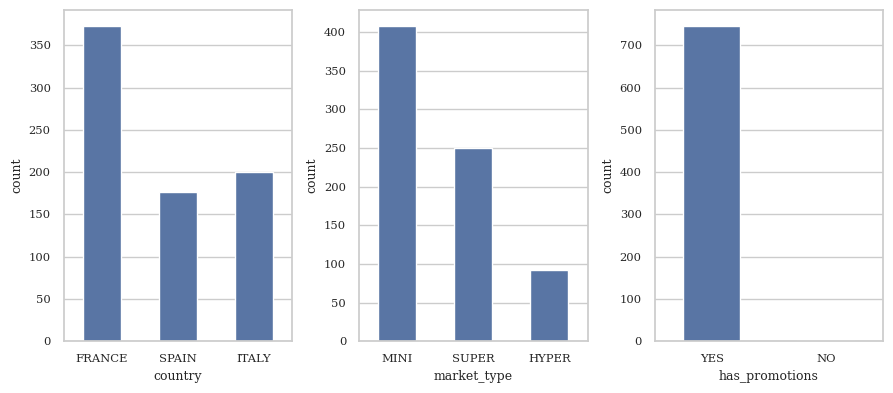

In [32]:
cat_names = ["country", "market_type", "has_promotions"]
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (9, 4))
index = 0
ax = ax.flatten()
for col_name in cat_names:
	sns.countplot(x = col_name, data = merged_df, ax = ax[index], width = 0.5)
	index += 1
plt.tight_layout()

In [33]:
len(merged_df[merged_df["has_promotions"] == "NO"])

4

### Categorical variables encoding

encode categorical variables

In [34]:
# split country and market_type
merged_df = pd.concat([merged_df, merged_df["country"].rename("is_italy"),
	merged_df["market_type"].rename("is_super")], axis = 1)
merged_df.rename(columns = {"country": "is_spain", "market_type": "is_mini"}, inplace = True)
merged_df = merged_df[["sales_amount", "is_open", "is_spain", "is_italy", "is_mini", "is_super",
	"square_feet", "avg_customers", "competitor_distance", "has_promotions"]]

# country
merged_df["is_spain"] = merged_df["is_spain"].map({"SPAIN": 1, "FRANCE": 0, "ITALY": 0})
merged_df["is_italy"] = merged_df["is_italy"].map({"SPAIN": 0, "FRANCE": 0, "ITALY": 1})

# market_type
merged_df["is_mini"] = merged_df["is_mini"].map({"MINI": 1, "SUPER": 0, "HYPER": 0})
merged_df["is_super"] = merged_df["is_super"].map({"MINI": 0, "SUPER": 1, "HYPER": 0})

# has_promotions
merged_df["has_promotions"] = merged_df["has_promotions"].map({"YES": 1, "NO": 0})

display(merged_df)

sales_amount   is_open  is_spain  is_italy  is_mini  is_super  \
0    12609.579520  0.827397         0         0        1         0   
1    26573.814219  0.820513         0         0        0         1   
2    26124.283769  0.830137         0         0        0         1   
3    11856.326518  0.820513         1         0        1         0   
4    12392.551096  0.824658         0         0        1         0   
..            ...       ...       ...       ...      ...       ...   
745  12570.549505  0.830137         0         0        1         0   
746  12375.246473  0.820513         0         0        1         0   
747  26404.851308  0.827397         0         0        0         1   
748  12542.256577  0.818681         0         0        1         0   
749  12427.376908  0.832877         0         0        1         0   

     square_feet  avg_customers  competitor_distance  has_promotions  
0           2437            248                   58               1  
1           6403            493                  300               1  
2           7544            340                 1598               1  
3           1940            165                 2068               1  
4           1486            166                  750               1  
..           ...            ...                  ...             ...  
745         1691            272                 1843               1  
746         1462            159                  547               1  
747         5946            488                 2743               1  
748         1413            239                 1920               1  
749         2144            188                 6811               1  

[750 rows x 10 columns]

### Scatterplots & correlation matrix

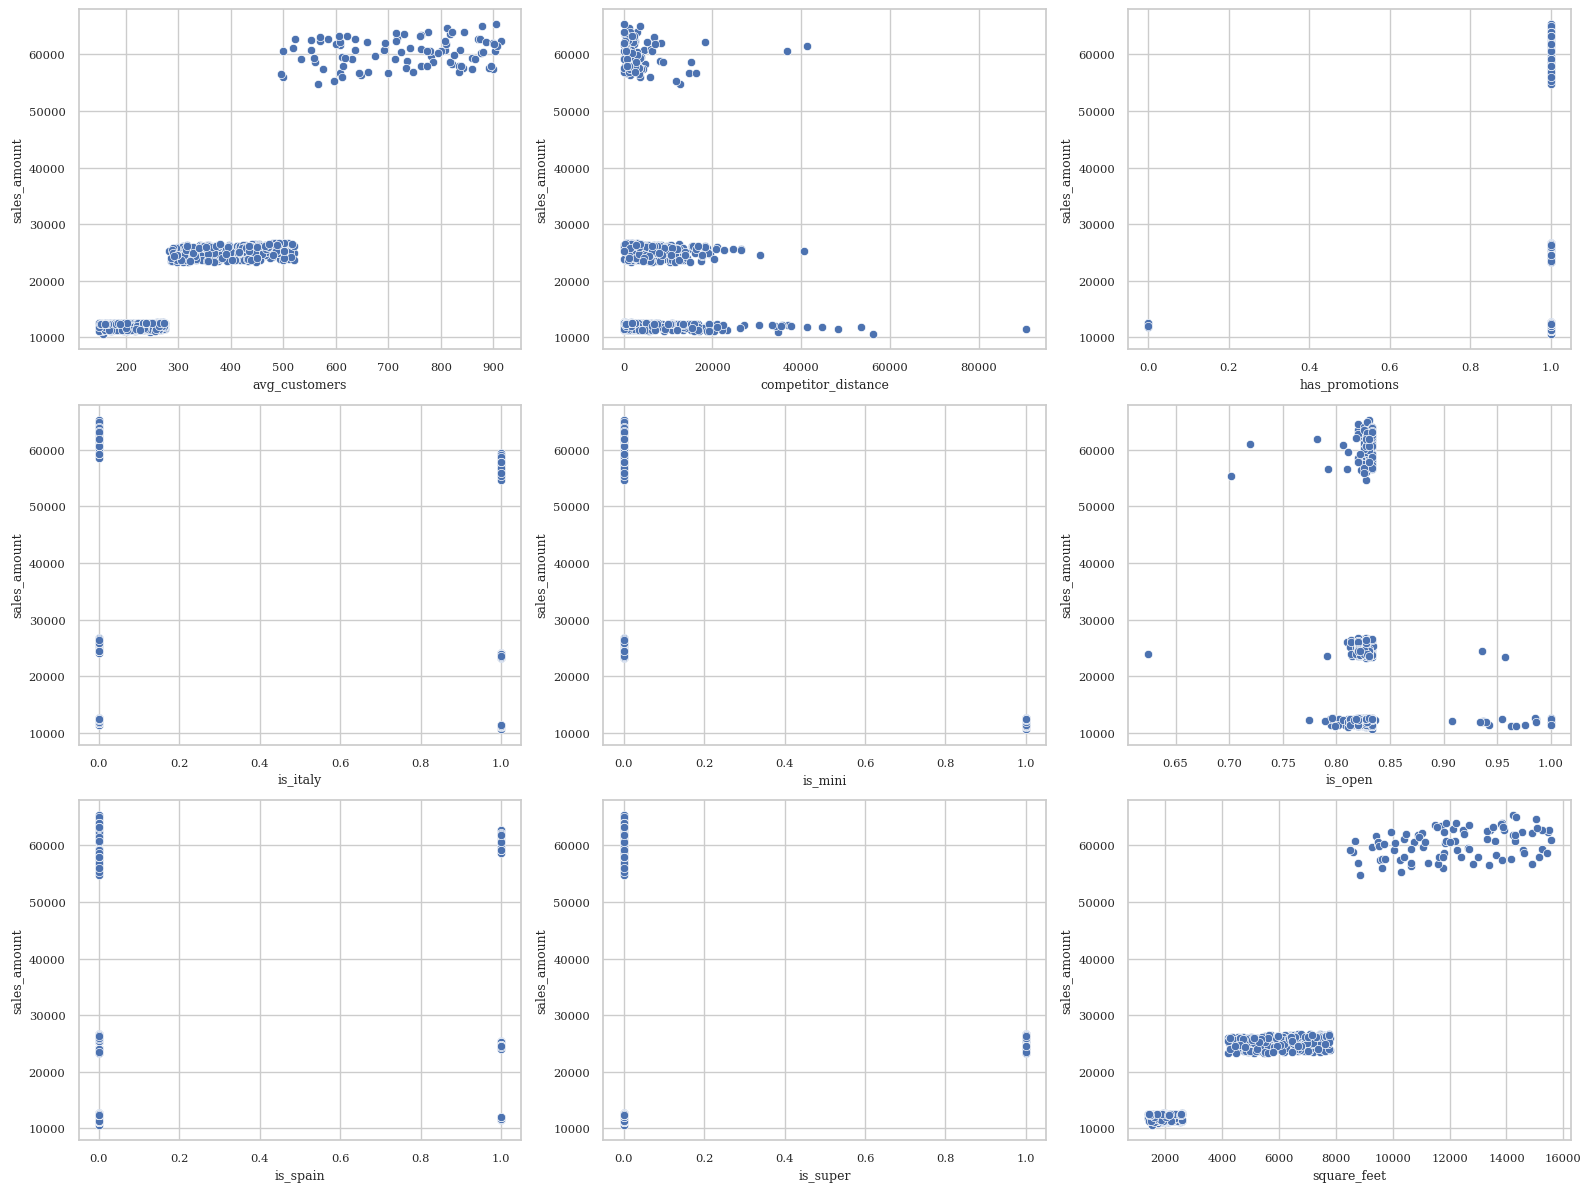

In [35]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (16, 12))
index = 0
ax = ax.flatten()
for col_name in merged_df.columns.difference(["sales_amount"]):
	current_plot = sns.scatterplot(y = merged_df["sales_amount"], x = merged_df[col_name], ax = ax[index])
	index = index + 1
plt.tight_layout()

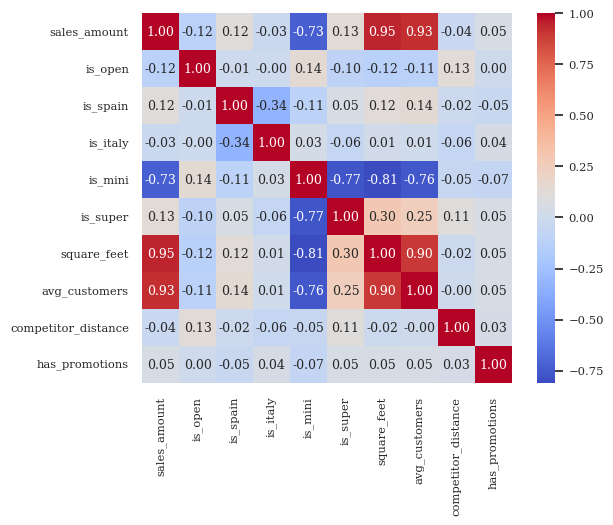

In [36]:
ax = sns.heatmap(merged_df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f", square = True)
ax.tick_params(left = False, bottom = False)

# Objective 1

In [37]:
merged_df

sales_amount   is_open  is_spain  is_italy  is_mini  is_super  \
0    12609.579520  0.827397         0         0        1         0   
1    26573.814219  0.820513         0         0        0         1   
2    26124.283769  0.830137         0         0        0         1   
3    11856.326518  0.820513         1         0        1         0   
4    12392.551096  0.824658         0         0        1         0   
..            ...       ...       ...       ...      ...       ...   
745  12570.549505  0.830137         0         0        1         0   
746  12375.246473  0.820513         0         0        1         0   
747  26404.851308  0.827397         0         0        0         1   
748  12542.256577  0.818681         0         0        1         0   
749  12427.376908  0.832877         0         0        1         0   

     square_feet  avg_customers  competitor_distance  has_promotions  
0           2437            248                   58               1  
1           6403            493                  300               1  
2           7544            340                 1598               1  
3           1940            165                 2068               1  
4           1486            166                  750               1  
..           ...            ...                  ...             ...  
745         1691            272                 1843               1  
746         1462            159                  547               1  
747         5946            488                 2743               1  
748         1413            239                 1920               1  
749         2144            188                 6811               1  

[750 rows x 10 columns]

## Feature selection

$$y = \beta_0 + \beta_1 X_1 + \dots + \beta_n X_n + \varepsilon = \hat{y} + \varepsilon \, \implies \, \textit{residuals} = \varepsilon = y - \hat{y}$$
$$\log(y) = \beta_0 + \beta_1 X_1 + \dots + \beta_n X_n = \widehat{\log(y)} + \varepsilon \, \implies \, \varepsilon = \log(y) - \widehat{\log(y)}, \text{ hence we consider } \textit{residuals} = e^{\log(y)} - e^{\widehat{\log(y)}} = y - e^{\widehat{\log(y)}}$$

In [38]:
# define a function to calculate RSE, R2, and MSE
def calculate_metrics(y_test, y_pred, p):
	residuals = y_test - y_pred
	RSE = (sum(residuals ** 2) / (len(residuals) - p - 1)) ** 0.5
	R2 = 1 - sum(residuals ** 2) / sum((y_test - y_test.mean()) ** 2)
	MSE = (residuals ** 2).mean()
	return RSE, R2, MSE

def better_by_criteria(value_1, value_2, criteria):
	if (criteria == "RSE") or (criteria == "MSE"):
		return (value_1 < value_2)
	elif (criteria == "R2"):
		return (value_1 > value_2)

# forward selection
def forward_selection_v2(training_method, X, y, criteria, alpha = 0.1):
	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)
	
	# initialize parameters
	p = X.shape[1]
	best_features = [[]] * p
	best_metrics_k = {
		"RSE": float("inf"),
		"R2": 0,
		"MSE": float("inf"),
	}
	best_metrics = []
	for _ in range(p):
		best_metrics.append(best_metrics_k.copy())
	current_features = []
	remaining_features = list(X.columns)
	
	# for each number of features
	for k in range(0, p):
		# for each combination of k number of features
		for new_feature in remaining_features:
			model_features = current_features + [new_feature]
			X_subset = X[model_features]
			# add a constant for the intercept term
			X_subset = sm.add_constant(X_subset)  
			# initialize empty array to store mse for each fold
			cv_folds = {
				"RSE": 0,
				"R2": 0,
				"MSE": 0,
				"len": 0
			}
			# for each fold fit the model and estimate cv test error (using the mean of MSE in all folds)
			for train_index, validation_index in kf.split(X_subset):
				X_train, X_validation = X_subset.iloc[train_index], X_subset.iloc[validation_index]
				y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
				if training_method == "OLS":
					model = sm.OLS(y_train, X_train).fit()
				elif training_method == "Ridge":
					model = Ridge(alpha = alpha).fit(X_train, y_train)
				elif training_method == "Lasso":
					model = Lasso(alpha = alpha).fit(X_train, y_train)
				else:
					print("error: " + training_method + " is not an available model")
					return
				y_pred = model.predict(X_validation)
				RSE, R2, MSE = calculate_metrics(y_validation, y_pred, k + 1)
				cv_folds["RSE"] = cv_folds["RSE"] + RSE
				cv_folds["R2"] = cv_folds["R2"] + R2
				cv_folds["MSE"] = cv_folds["MSE"] + MSE
				cv_folds["len"] = cv_folds["len"] + 1
			cv_folds = {key: cv_folds[key] / cv_folds["len"] for key in cv_folds.keys()}
			# if the estimation of the test error is reduced, save metrics and model
			if better_by_criteria(cv_folds[criteria], best_metrics[k][criteria], criteria):
				best_metrics[k]["RSE"] = cv_folds["RSE"]
				best_metrics[k]["R2"] = cv_folds["R2"]
				best_metrics[k]["MSE"] = cv_folds["MSE"]
				best_features[k] = model_features
		current_features = best_features[k]
		remaining_features = list(set(remaining_features) - set(current_features))
	return best_features, best_metrics

def plot_metrics(metrics, name_variables = "features"):
	p = len(metrics)
	_, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (12, 4))
	index = 0
	ax = ax.flatten()
	for error_type in ["RSE", "R2", "MSE"]:
		error_list = [metrics[k][error_type] for k in range(p)]
		sns.lineplot(x = range(1, p + 1), y = error_list, ax = ax[index])
		sns.scatterplot(x = range(1, p + 1), y = error_list, ax = ax[index])
		ax[index].set_title(error_type)
		ax[index].set_xlabel("k (n. " + name_variables + ")")
		ax[index].set_ylabel(error_type + "(k)")
		index = index + 1
	plt.tight_layout()
	plt.show()

def report_best_parameters(features, metrics, criteria, model_name = "", verbose = True):
	p = len(metrics)
	criteria_list = [metrics[k][criteria] for k in range(p)]
	if (criteria == "RSE") or (criteria == "MSE"):
		criteria_best_k = criteria_list.index(min(criteria_list))
	elif (criteria == "R2"):
		criteria_best_k = criteria_list.index(max(criteria_list))
	if verbose == True:
		print(model_name + ":\n\t- k =", criteria_best_k + 1, "\n\t- features =", features[criteria_best_k])
		print(model_name, "metrics:\n\t- RSE:", metrics[criteria_best_k]["RSE"])
		print("\t- R2:", metrics[criteria_best_k]["R2"])
		print("\t- MSE:", metrics[criteria_best_k]["MSE"])
	return features[criteria_best_k], metrics[criteria_best_k]

OLS best linear:
	- k = 7 
	- features = ['square_feet', 'avg_customers', 'is_super', 'is_mini', 'is_italy', 'is_spain', 'competitor_distance']
OLS best linear metrics:
	- RSE: 658.1887588370063
	- R2: 0.9982573016464691
	- MSE: 413572.984906783


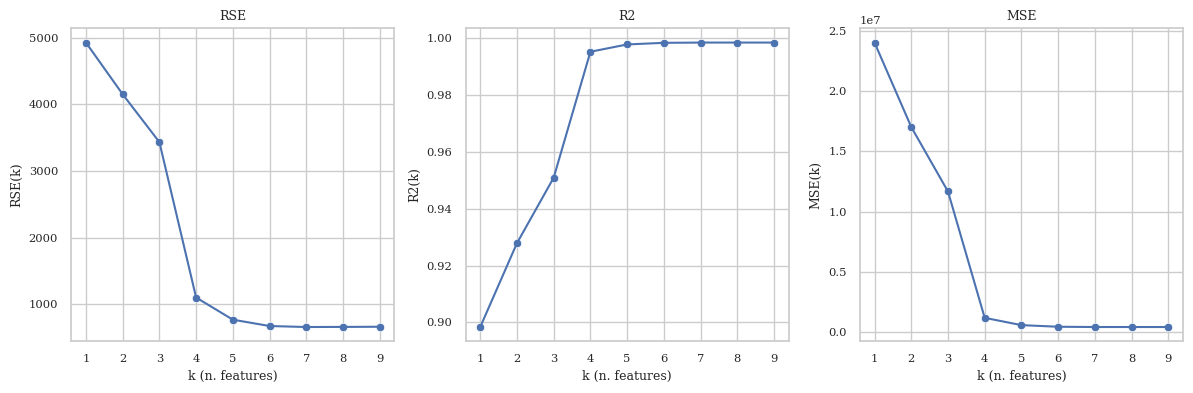

In [39]:
# model
model_name = "OLS best linear"

# load the dataset
X = merged_df.loc[:, merged_df.columns != "sales_amount"]
y = merged_df["sales_amount"]

# calculate and display the results
criteria = "RSE"
training_method = "OLS"
all_best_features, all_best_metrics = forward_selection_v2(training_method, X, y, criteria)
best_features, best_metrics = report_best_parameters(all_best_features, all_best_metrics, criteria, model_name)
ols_best_linear_metrics = best_metrics
plot_metrics(all_best_metrics)

# store cv errors
cv_errors = pd.DataFrame([best_metrics])
cv_errors = cv_errors.rename(index = {0: model_name})

abbiamo usato l'RSE perchè ci permetteva di escludere il numero maggiori di variabili ottenendo un'accuratezza praticamente identica agli altri 2 casi

## Best linear model analysis

In [40]:
# split in train and test
X = merged_df[best_features]
y = merged_df["sales_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

# fit the linear regression model
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_with_intercept).fit()

# model accuracy (RSE, R2 and MSE)
y_pred = model.predict(X_test_with_intercept)
RSE, R2, MSE = calculate_metrics(y_test, y_pred, p = X_train.shape[1])
print("test errors:\n\t- RSE:", RSE, "\n\t- R2:", R2, "\n\t- MSE:", MSE)

test errors:
	- RSE: 575.5061159721496 
	- R2: 0.9985299718418624 
	- MSE: 313542.9007468774


In [41]:
# coefficient estimates 
coefficients = model.params

# dataframe with all coefficients and stats of interest 
rows = []
for index, value in coefficients.items():
	row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
	rows.append(row)
summary_coeff = pd.DataFrame(rows, columns = ["", "ols estimation", "SE", "t-stats", "p-value"])
summary_coeff

ols estimation          SE     t-stats        p-value
0                const    55742.442570  436.364747  127.742773   0.000000e+00
1          square_feet        0.273939    0.026446   10.358259   3.211469e-23
2        avg_customers        2.944094    0.396751    7.420511   4.073315e-13
3             is_super   -32524.127510  224.107492 -145.127355   0.000000e+00
4              is_mini   -44017.672907  346.367329 -127.083790   0.000000e+00
5             is_italy    -2065.714140   63.466797  -32.547950  5.456902e-134
6             is_spain     -897.419660   67.839991  -13.228476   3.492094e-35
7  competitor_distance       -0.020311    0.003100   -6.552110   1.234140e-10

In [42]:
# 95% confidence intervals
confidence_intervals = model.conf_int(alpha = 0.05)  # 0.05 for a 95% confidence interval

print("the 95% confidence intervals:")
for index, value in coefficients.items():
    current_conf_int = confidence_intervals.loc[index].values
    print("\t - ",index, "is", current_conf_int)

the 95% confidence intervals:
	 -  const is [54885.43125518 56599.45388459]
	 -  square_feet is [0.22199882 0.32587933]
	 -  avg_customers is [2.16488354 3.72330443]
	 -  is_super is [-32964.26997689 -32083.98504269]
	 -  is_mini is [-44697.93115869 -43337.41465574]
	 -  is_italy is [-2190.36161382 -1941.0666666 ]
	 -  is_spain is [-1030.65599507  -764.18332421]
	 -  competitor_distance is [-0.026399   -0.01422274]


### Residuals analysis

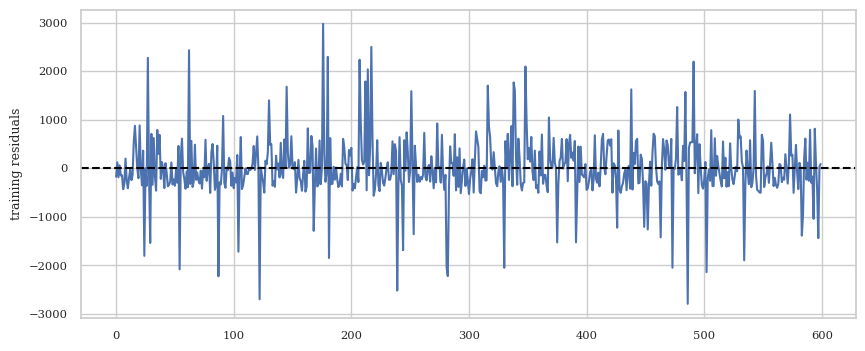

In [43]:
residuals_training = model.resid

plt.figure(figsize = (10, 4))
fig = sns.lineplot(x = range(0, len(residuals_training)), y = residuals_training)
fig.axhline(0, linestyle = "--", color = "black")
plt.ylabel("training residuals")
plt.show()

In [44]:
# autocorrelation
lagged_residuals = residuals_training.shift(1)
autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

# durbin_watson
durbin_watson = sm.stats.durbin_watson(residuals_training)
print("- autocorrelation:", round(autocorrelation, 5), "\n- durbin-watson statistic:", round(durbin_watson, 5))

- autocorrelation: 0.00078 
- durbin-watson statistic: 1.94394


suggesting that error terms are not correlated

analysis of homoskedasticity/heteroskedasticity

In [45]:
mini_index = merged_df[merged_df["is_mini"] == 1].index
super_index = merged_df[merged_df["is_super"] == 1].index
hyper_index = merged_df[(merged_df["is_mini"] == 0) & (merged_df["is_super"] == 0)].index
list_index = [mini_index, super_index, hyper_index]
list_names = ["Mini", "Super", "Hyper"]

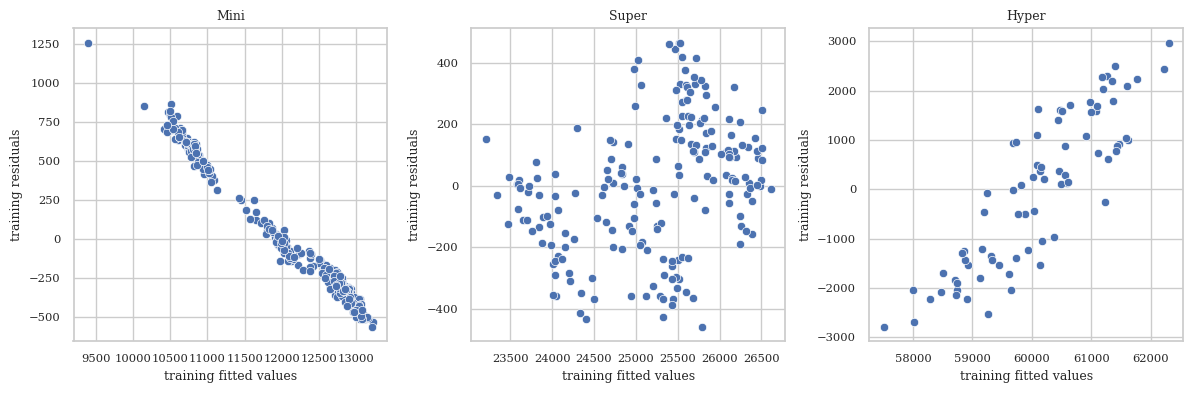

In [46]:
# variance of error terms: residuals vs fitted values
_, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (12, 4))
index = 0
ax = ax.flatten()
for index in range(3):
	remove_indexes = list_index[:index] + list_index[(index + 1):]
	X_train_with_intercept_market = X_train_with_intercept.loc[X_train_with_intercept.index.difference(remove_indexes[0]).difference(remove_indexes[1])]
	residuals_training_market = residuals_training.loc[residuals_training.index.difference(remove_indexes[0]).difference(remove_indexes[1])]
	sns.scatterplot(x = model.predict(X_train_with_intercept_market), y = residuals_training_market, ax = ax[index])
	ax[index].set_title(list_names[index])
	ax[index].set_xlabel("training fitted values")
	ax[index].set_ylabel("training residuals")
	index = index + 1
plt.tight_layout()

In [47]:
name = ["lagrange multiplier statistic", "p-value"]
test = sm.stats.het_breuschpagan(residuals_training, model.model.exog)
print("- lagrange multiplier statistic:", lzip(name, test)[0][1], "\n- p-value:", lzip(name, test)[1][1])

- lagrange multiplier statistic: 335.148415502503 
- p-value: 1.8572765906962078e-68


### Collinearity

In [48]:
# collinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
vif

VIF Factor              Feature
0   16.135825          square_feet
1   19.946057        avg_customers
2    1.889666             is_super
3    2.085008              is_mini
4    1.572465             is_italy
5    1.543671             is_spain
6    1.451100  competitor_distance

### Backward selection

In [49]:
# backward selection
def backward_selection_v2(training_method, X, y, criteria, alpha = 0.1):
	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)
	
	# initialize parameters
	p = X.shape[1]
	best_features = [[]] * p
	best_metrics_k = {
		"RSE": float("inf"),
		"R2": 0,
		"MSE": float("inf"),
	}
	best_metrics = []
	for _ in range(p):
		best_metrics.append(best_metrics_k.copy())
	current_features = list(X.columns)
	removable_features = [" "]
	
	# for each number of features
	for k in range(p, 0, -1):
		for new_feature in removable_features:
			model_features = list(set(current_features) - set([new_feature]))
			X_subset = X[model_features]
			# add a constant for the intercept term
			X_subset = sm.add_constant(X_subset)  
			# initialize empty array to store mse for each fold
			cv_folds = {
				"RSE": 0,
				"R2": 0,
				"MSE": 0,
				"len": 0
			}
			# for each fold fit the model and estimate cv test error (using the mean of MSE in all folds)
			for train_index, validation_index in kf.split(X_subset):
				X_train, X_validation = X_subset.iloc[train_index], X_subset.iloc[validation_index]
				y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
				if training_method == "OLS":
					model = sm.OLS(y_train, X_train).fit()
				elif training_method == "Ridge":
					model = Ridge(alpha = alpha).fit(X_train, y_train)
				elif training_method == "Lasso":
					model = Lasso(alpha = alpha).fit(X_train, y_train)
				else:
					print("error: " + training_method + " is not an available model")
					return
				y_pred = model.predict(X_validation)
				RSE, R2, MSE = calculate_metrics(y_validation, y_pred, k)
				cv_folds["RSE"] = cv_folds["RSE"] + RSE
				cv_folds["R2"] = cv_folds["R2"] + R2
				cv_folds["MSE"] = cv_folds["MSE"] + MSE
				cv_folds["len"] = cv_folds["len"] + 1
			cv_folds = {key: cv_folds[key] / cv_folds["len"] for key in cv_folds.keys()}
			# if the estimation of the test error is reduced, save metrics and model
			if better_by_criteria(cv_folds[criteria], best_metrics[k - 1][criteria], criteria):
				best_metrics[k - 1]["RSE"] = cv_folds["RSE"]
				best_metrics[k - 1]["R2"] = cv_folds["R2"]
				best_metrics[k - 1]["MSE"] = cv_folds["MSE"]
				best_features[k - 1] = model_features
		current_features = best_features[k - 1]
		removable_features = current_features
	return best_features, best_metrics

OLS best linear (backward):
	- k = 7 
	- features = ['is_super', 'is_spain', 'avg_customers', 'is_mini', 'square_feet', 'is_italy', 'competitor_distance']
OLS best linear (backward) metrics:
	- RSE: 658.1887588304853
	- R2: 0.9982573016465061
	- MSE: 413572.9848988246


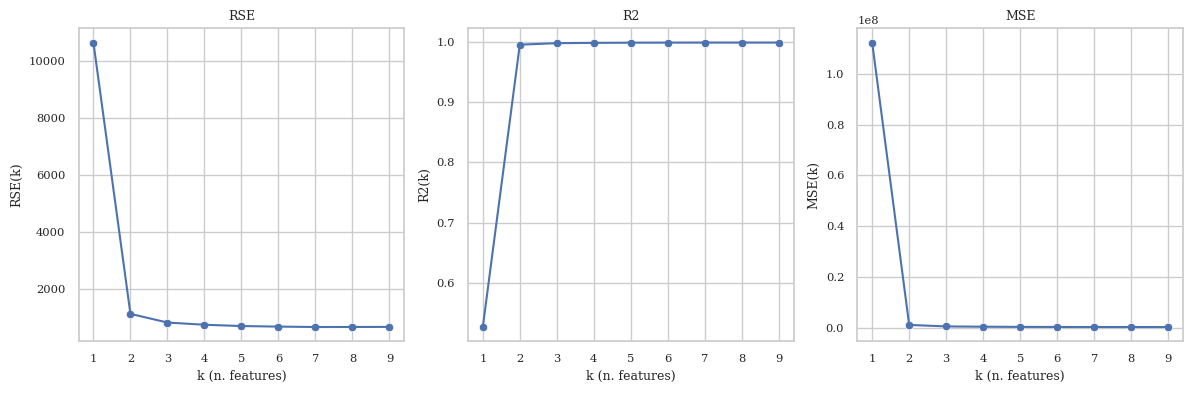

In [50]:
model_name = "OLS best linear (backward)"

X = merged_df.loc[:, merged_df.columns != "sales_amount"]
y = merged_df["sales_amount"]

criteria = "RSE"
training_method = "OLS"
all_best_features, all_best_metrics = backward_selection_v2(training_method, X, y, criteria)
best_features, best_metrics = report_best_parameters(all_best_features, all_best_metrics, criteria, model_name)
plot_metrics(all_best_metrics)

seleziona lo stesso modello (evviva)

## Shrinkage methods

In [51]:
X = merged_df.loc[:, merged_df.columns != "sales_amount"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
y = merged_df["sales_amount"]

criteria = "RSE"
alpha_values = [0.001, 0.01, 0.1, 1]

### Ridge

In [52]:
model_name = "Ridge best linear"
training_method = "Ridge"
print(training_method + ":")
best_alpha = 0
best_alpha_metrics = {
	"RSE": float("inf"),
	"R2": 0,
	"MSE": float("inf"),
	"features": [],
	"k": 0,
}
for alpha in alpha_values:
	all_best_features, all_best_metrics = forward_selection_v2(training_method, X_scaled, y, criteria, alpha = alpha)
	best_features, best_metrics = report_best_parameters(all_best_features, all_best_metrics, criteria, verbose = False)
	if best_metrics["RSE"] < best_alpha_metrics["RSE"]:
		best_alpha_metrics["RSE"] = best_metrics["RSE"]
		best_alpha_metrics["R2"] = best_metrics["R2"]
		best_alpha_metrics["MSE"] = best_metrics["MSE"]
		best_alpha_metrics["features"] = best_features
		best_alpha_metrics["k"] = len(best_features)
		best_alpha = alpha
print("\t" + model_name + ":\n\t\t- alpha =", best_alpha,"\n\t\t- k =", best_alpha_metrics["k"], "\n\t\t- features =", best_alpha_metrics["features"])
print("\t" + model_name, "metrics:\n\t\t- RSE:", best_alpha_metrics["RSE"])
print("\t\t- R2:", best_alpha_metrics["R2"])
print("\t\t- MSE:", best_alpha_metrics["MSE"])

cv_errors = pd.concat([cv_errors, pd.DataFrame([{key: value for key, value in best_alpha_metrics.items() if key not in ["k", "features"]}])])
cv_errors = cv_errors.rename(index = {0: model_name})

Ridge:
	Ridge best linear:
		- alpha = 0.001 
		- k = 7 
		- features = ['square_feet', 'avg_customers', 'is_super', 'is_mini', 'is_italy', 'is_spain', 'competitor_distance']
	Ridge best linear metrics:
		- RSE: 658.1989252297045
		- R2: 0.9982572692829595
		- MSE: 413580.41877036606


### Lasso

In [53]:
model_name = "Lasso best linear"
training_method = "Lasso"
print(training_method + ":")
best_alpha = 0
best_alpha_metrics = {
	"RSE": float("inf"),
	"R2": 0,
	"MSE": float("inf"),
	"features": [],
	"k": 0,
}
for alpha in alpha_values:
	all_best_features, all_best_metrics = forward_selection_v2(training_method, X_scaled, y, criteria, alpha = alpha)
	best_features, best_metrics = report_best_parameters(all_best_features, all_best_metrics, criteria, verbose = False)
	if best_metrics["RSE"] < best_alpha_metrics["RSE"]:
		best_alpha_metrics["RSE"] = best_metrics["RSE"]
		best_alpha_metrics["R2"] = best_metrics["R2"]
		best_alpha_metrics["MSE"] = best_metrics["MSE"]
		best_alpha_metrics["features"] = best_features
		best_alpha_metrics["k"] = len(best_features)
		best_alpha = alpha
print("\t" + model_name + ":\n\t\t- alpha =", best_alpha,"\n\t\t- k =", best_alpha_metrics["k"], "\n\t\t- features =", best_alpha_metrics["features"])
print("\t" + model_name, "metrics:\n\t\t- RSE:", best_alpha_metrics["RSE"])
print("\t\t- R2:", best_alpha_metrics["R2"])
print("\t\t- MSE:", best_alpha_metrics["MSE"])

cv_errors = pd.concat([cv_errors, pd.DataFrame([{key: value for key, value in best_alpha_metrics.items() if key not in ["k", "features"]}])])
cv_errors = cv_errors.rename(index = {0: model_name})

Lasso:
	Lasso best linear:
		- alpha = 0.001 
		- k = 7 
		- features = ['square_feet', 'avg_customers', 'is_super', 'is_mini', 'is_italy', 'is_spain', 'competitor_distance']
	Lasso best linear metrics:
		- RSE: 658.189060588481
		- R2: 0.9982573006985387
		- MSE: 413573.20957574714


## Dimensionality reduction techniques

### PCA

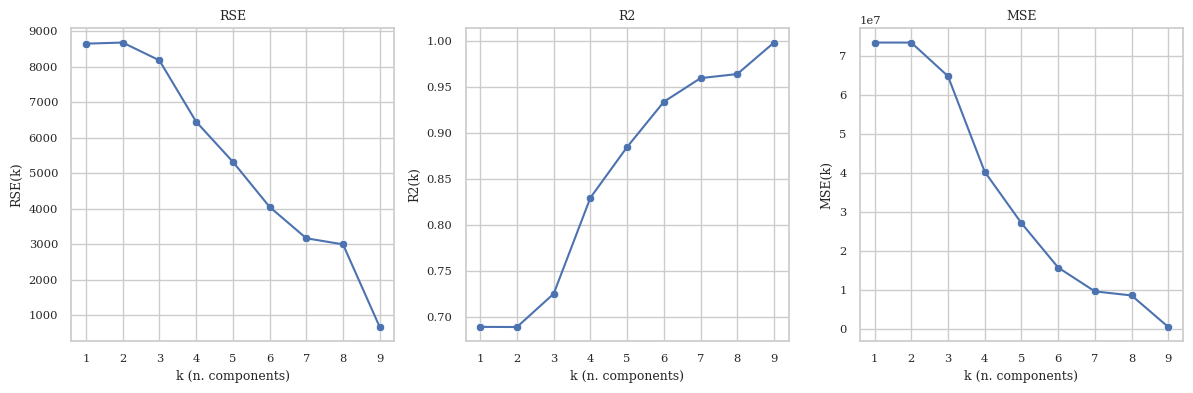

In [54]:
# PCA
def pca_regression(X, y):
	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)

	# standardize features by removing the mean and scaling to unit variance
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X)
	X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

	# initialize parameters
	p = X_scaled.shape[1]
	errors_pca_k = {
		"RSE": float("inf"),
		"R2": 0,
		"MSE": float("inf"),
	}
	errors_pca = []
	for _ in range(p):
		errors_pca.append(errors_pca_k.copy())

	# for each number of principal components
	for k in range(1, p + 1):
		# transform using n_components for PCA
		pca = PCA(n_components = k)
		X_pca = pca.fit_transform(X_scaled)
		X_pca = pd.DataFrame(X_pca)
		# add a constant for the intercept term
		X_pca = sm.add_constant(X_pca)  
		# initialize empty array to store mse for each fold
		cv_folds = {
			"RSE": 0,
			"R2": 0,
			"MSE": 0,
			"len": 0
		}
		# for each fold fit the model
		for train_index, validation_index in kf.split(X_pca):
			X_train, X_validation = X_pca.iloc[train_index], X_pca.iloc[validation_index]
			y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
			model = sm.OLS(y_train, X_train).fit()
			y_pred = model.predict(X_validation)
			RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_train.shape[1])
			cv_folds["RSE"] = cv_folds["RSE"] + RSE
			cv_folds["R2"] = cv_folds["R2"] + R2
			cv_folds["MSE"] = cv_folds["MSE"] + MSE
			cv_folds["len"] = cv_folds["len"] + 1
		cv_folds = {key: cv_folds[key] / cv_folds["len"] for key in cv_folds.keys()}
		# save errors
		errors_pca[k - 1]["RSE"] = cv_folds["RSE"]
		errors_pca[k - 1]["R2"] = cv_folds["R2"]
		errors_pca[k - 1]["MSE"] = cv_folds["MSE"]
	return errors_pca

X = merged_df.loc[:, merged_df.columns != "sales_amount"]
y = merged_df["sales_amount"]

errors_pca = pca_regression(X, y)
plot_metrics(errors_pca, "components")

non è utile fare pca (si vede dai plot). <br>
in realtà ce lo aspettavamo perchè la pca non è un metodo indicato nel caso in cui si abbiamo sia variabili categoriale che variabili quantitative. <br>
l'effetto della standardizzazione dipende dalla numerosità delle categorie e non è perfettamente chiaro quale sia la loro influenza.

note: avendo standardizzato i predittori in teoria non sarebbe possibile arrivare a trovare i delta changes (risalire ai coefficienti della regressione rispetto ai predittori originali). comunque noi non lo dobbiamo fare

### PLS

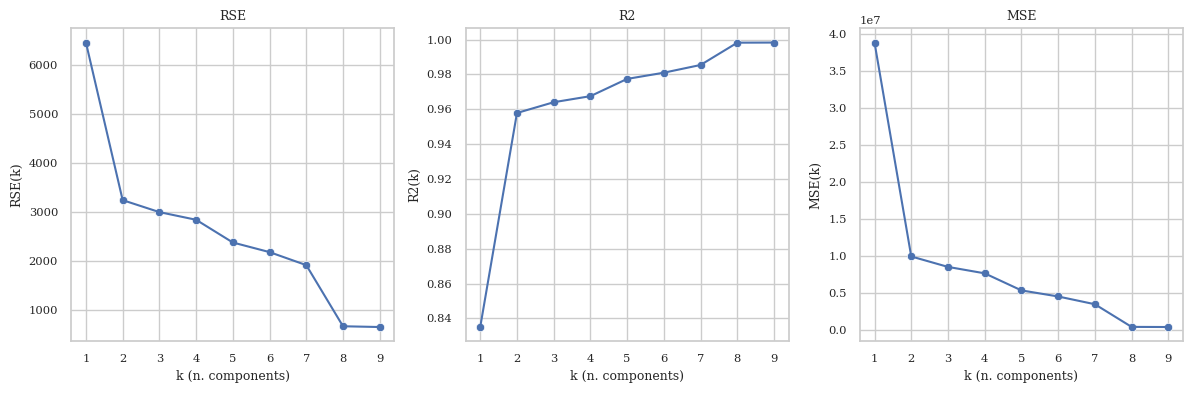

In [55]:
# PLS
def pls_regression(X, y):
	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)

	# standardize features by removing the mean and scaling to unit variance
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X)
	X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

	# initialize parameters
	p = X_scaled.shape[1]
	errors_pls_k = {
		"RSE": float("inf"),
		"R2": 0,
		"MSE": float("inf"),
	}
	errors_pls = []
	for _ in range(p):
		errors_pls.append(errors_pls_k.copy())

	# for each number of principal components
	for k in range(1, p + 1):
		# transform using n_components for PLS
		pls = PLSRegression(n_components = k) 
		# initialize empty array to store mse for each fold
		cv_folds = {
			"RSE": 0,
			"R2": 0,
			"MSE": 0,
			"len": 0
		}
		# for each fold fit the model
		for train_index, validation_index in kf.split(X_scaled):
			X_train, X_validation = X_scaled.iloc[train_index], X_scaled.iloc[validation_index]
			y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
			pls.fit(X_train, y_train)
			y_pred = pls.predict(X_validation)
			y_pred = pd.Series(y_pred)
			RSE, R2, MSE = calculate_metrics(y_validation.reset_index(drop = True), y_pred, X_train.shape[1]) 
			cv_folds["RSE"] = cv_folds["RSE"] + RSE
			cv_folds["R2"] = cv_folds["R2"] + R2
			cv_folds["MSE"] = cv_folds["MSE"] + MSE
			cv_folds["len"] = cv_folds["len"] + 1
		cv_folds = {key: cv_folds[key] / cv_folds["len"] for key in cv_folds.keys()}
		# save errors
		errors_pls[k - 1]["RSE"] = cv_folds["RSE"]
		errors_pls[k - 1]["R2"] = cv_folds["R2"]
		errors_pls[k - 1]["MSE"] = cv_folds["MSE"]
	return errors_pls

errors_pls = pls_regression(X, y)
plot_metrics(errors_pls, "components")

non è utile fare pls (si vede dai plot)

## Conclusions

non è significativa la differenza, scegliamo quindi ols che è un modello più semplice

In [56]:
pd.set_option('display.float_format', lambda x: '%.4e' % x)
display(cv_errors)

RSE         R2        MSE
OLS best linear   6.5819e+02 9.9826e-01 4.1357e+05
Ridge best linear 6.5820e+02 9.9826e-01 4.1358e+05
Lasso best linear 6.5819e+02 9.9826e-01 4.1357e+05

In [57]:
# split in train and test
X = merged_df[best_features]
y = merged_df["sales_amount"]

# fit the linear regression model
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()

# coefficient estimates 
coefficients = pd.DataFrame(model.params)
coefficients.rename(columns = {0: "coefficients"})

coefficients
const                  5.5695e+04
square_feet            2.7822e-01
avg_customers          3.1309e+00
is_super              -3.2576e+04
is_mini               -4.4017e+04
is_italy              -2.0448e+03
is_spain              -9.4054e+02
competitor_distance   -1.9097e-02

# Objective 2

In [58]:
cv_mse = pd.DataFrame([{"MSE": cv_errors["MSE"]["OLS best linear"]}])
cv_mse = cv_mse.rename(index = {0: "linear regression"})
cv_mse

MSE
linear regression 4.1357e+05

## Log linear regression

solution to heteroskedasticity: log of the target

### Feature selection

In [59]:
# X_scaled
X = merged_df.loc[:, merged_df.columns != "sales_amount"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# y
y = merged_df["sales_amount"]

log linear regression:
	- k = 7 
	- features = ['square_feet', 'is_mini', 'is_super', 'is_italy', 'is_spain', 'competitor_distance', 'avg_customers']
log linear regression metrics:
	- RSE: 0.002448605234753504
	- R2: 0.9999812177631838
	- MSE: 5.706365629993585e-06


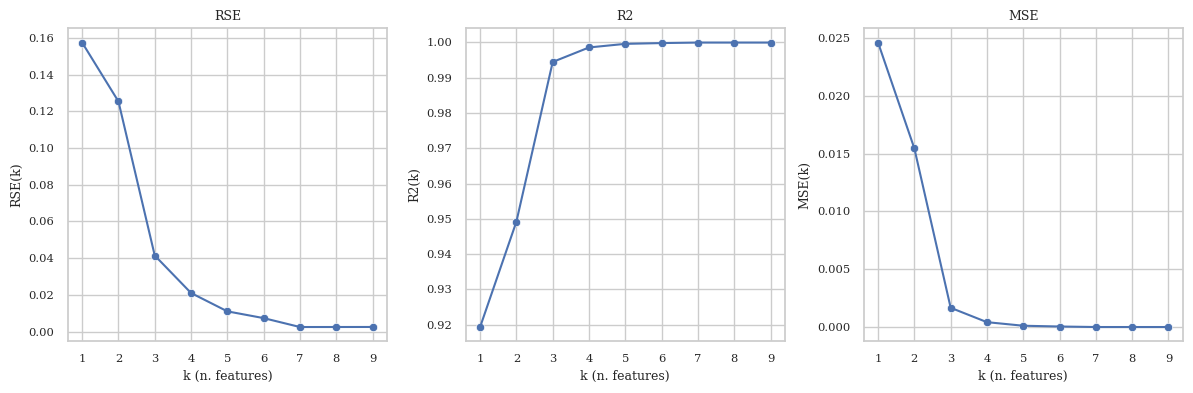

In [60]:
model_name = "log linear regression"

criteria = "RSE"
training_method = "OLS"
all_best_features, all_best_metrics = forward_selection_v2(training_method, X, np.log(y), criteria)
best_features, best_metrics = report_best_parameters(all_best_features, all_best_metrics, criteria, model_name)
plot_metrics(all_best_metrics)

osservazione: abbiamo scelto di usare l'RSE per selezionare le features ma in realtà usando l'MSE o l'R2 il risultato è invariato.

### Cross-validation

In [61]:
X_with_intercept = sm.add_constant(X_scaled[best_features])  

# store mse
mse_folds = 0

# initialize kfold object to use for model evaluation
number_folds = 5
kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)

# run k-fold cv
for train_idx, validation_idx in kf.split(X_with_intercept):
	X_train, X_validation = X_with_intercept.iloc[train_idx], X_with_intercept.iloc[validation_idx]
	y_log_train, y_log_validation = np.log(y).iloc[train_idx], np.log(y).iloc[validation_idx]

	# fit	
	model = sm.OLS(y_log_train, X_train).fit()


	# predict
	y_log_pred = model.predict(X_validation)
	y_validation = merged_df["sales_amount"][y_log_validation.index]
	mse_folds = mse_folds + ((y_validation - np.exp(y_log_pred)) ** 2).mean()

# cross-validation MSE
estimated_test_error = mse_folds / number_folds
cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": estimated_test_error}])])
cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression     4.1357e+05
log linear regression 4.5784e+03

In [62]:
X = merged_df[['square_feet', 'is_mini', 'is_super', 'is_italy', 'is_spain', 'competitor_distance', 'avg_customers']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
y = merged_df['sales_amount']
display(X_scaled, pd.DataFrame(y))

square_feet     is_mini    is_super    is_italy    is_spain  \
0    -6.1843e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
1     5.1708e-01 -1.0922e+00  1.4142e+00 -6.0302e-01 -5.5579e-01   
2     8.4377e-01 -1.0922e+00  1.4142e+00 -6.0302e-01 -5.5579e-01   
3    -7.6073e-01  9.1555e-01 -7.0711e-01 -6.0302e-01  1.7992e+00   
4    -8.9071e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
..           ...         ...         ...         ...         ...   
745  -8.3202e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
746  -8.9759e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
747   3.8624e-01 -1.0922e+00  1.4142e+00 -6.0302e-01 -5.5579e-01   
748  -9.1162e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
749  -7.0232e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   

     competitor_distance  avg_customers  
0            -6.6040e-01    -4.9556e-01  
1            -6.3095e-01     8.5080e-01  
2            -4.7301e-01     1.0016e-02  
3            -4.1582e-01    -9.5167e-01  
4            -5.7619e-01    -9.4617e-01  
..                   ...            ...  
745          -4.4319e-01    -3.6367e-01  
746          -6.0089e-01    -9.8464e-01  
747          -3.3368e-01     8.2333e-01  
748          -4.3382e-01    -5.4501e-01  
749           1.6132e-01    -8.2528e-01  

[750 rows x 7 columns]

sales_amount
0      1.2610e+04
1      2.6574e+04
2      2.6124e+04
3      1.1856e+04
4      1.2393e+04
..            ...
745    1.2571e+04
746    1.2375e+04
747    2.6405e+04
748    1.2542e+04
749    1.2427e+04

[750 rows x 1 columns]

### Best log linear model analysis

accuracy with respect to the log of the target

In [63]:
# split in train and test
X_train, X_test, y_log_train, y_log_test = train_test_split(X, np.log(y), test_size = 0.2, random_state = 2023)

# fit the linear regression model
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)
model = sm.OLS(y_log_train, X_train_with_intercept).fit()

# model accuracy (RSE, R2 and MSE)
y_log_pred = model.predict(X_test_with_intercept)
RSE, R2, MSE = calculate_metrics(y_log_test, y_log_pred, p = X_train.shape[1])
print("test errors:\n\t- RSE:", RSE, "\n\t- R2:", R2, "\n\t- MSE:", MSE)

test errors:
	- RSE: 0.00254851146563338 
	- R2: 0.9999780980901065 
	- MSE: 6.148515453640009e-06


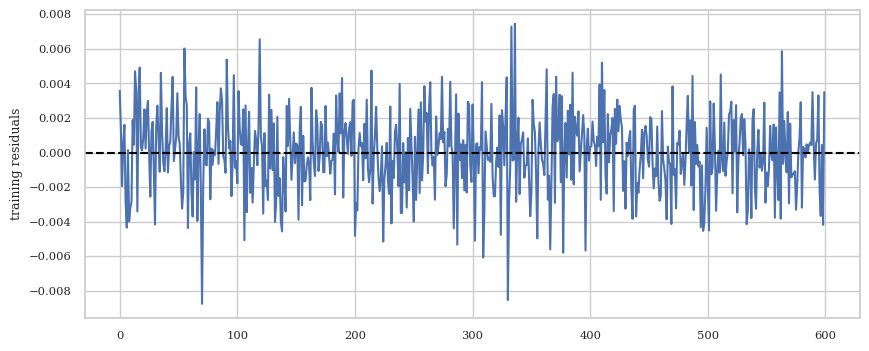

In [64]:
residuals_training = model.resid

plt.figure(figsize = (10, 4))
fig = sns.lineplot(x = range(0, len(residuals_training)), y = residuals_training)
fig.axhline(0, linestyle = "--", color = "black")
plt.ylabel("training residuals")
plt.show()

In [65]:
# autocorrelation
lagged_residuals = residuals_training.shift(1)
autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

# durbin_watson
durbin_watson = sm.stats.durbin_watson(residuals_training)
print("- autocorrelation:", round(autocorrelation, 5), "\n- durbin-watson statistic:", round(durbin_watson, 5))

- autocorrelation: 0.00434 
- durbin-watson statistic: 2.12373


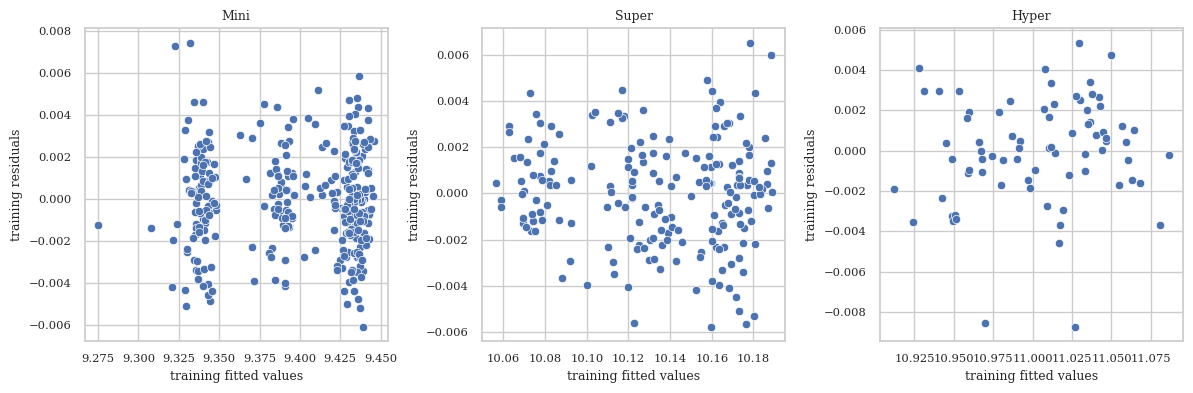

In [66]:
# variance of error terms: residuals vs fitted values
_, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (12, 4))
index = 0
ax = ax.flatten()
for index in range(3):
	remove_indexes = list_index[:index] + list_index[(index + 1):]
	X_train_with_intercept_market = X_train_with_intercept.loc[X_train_with_intercept.index.difference(remove_indexes[0]).difference(remove_indexes[1])]
	residuals_training_market = residuals_training.loc[residuals_training.index.difference(remove_indexes[0]).difference(remove_indexes[1])]
	sns.scatterplot(x = model.predict(X_train_with_intercept_market), y = residuals_training_market, ax = ax[index])
	ax[index].set_title(list_names[index])
	ax[index].set_xlabel("training fitted values")
	ax[index].set_ylabel("training residuals")
	index = index + 1
plt.tight_layout()

In [67]:
name = ["lagrange multiplier statistic", "p-value"]
test = sm.stats.het_breuschpagan(residuals_training, model.model.exog)
print("- lagrange multiplier statistic:", lzip(name, test)[0][1], "\n- p-value:", lzip(name, test)[1][1])

- lagrange multiplier statistic: 5.211360105798346 
- p-value: 0.6341873181260611


In [68]:
# collinearity
vif = pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["feature"] = X_train.columns
vif

VIF factor              feature
0  1.6136e+01          square_feet
1  2.0850e+00              is_mini
2  1.8897e+00             is_super
3  1.5725e+00             is_italy
4  1.5437e+00             is_spain
5  1.4511e+00  competitor_distance
6  1.9946e+01        avg_customers

## Polynomial regressions

il dataset che consideriamo per fare predizione è merged_df senza le variabili ridondanti relative a country e market_type (is_france e is_hyper), che erano derivanti dalla traduzione in variabili booleane. 

in realtà da questo punto in poi ci restringiamo a considerare le best features ottenute con la regressione lineare (con predictor log(y)). <br> 
in teoria andrebbe fatta la feature selection per ogni metodo a partire dal dataset merged_df (da cui come avevamo detto in precedenza sarebbe più corretto rimuovere is_france e is_hyper), però non lo facciamo perchè:
- per evitare di appesantire la relazione;
- abbiamo già appurato che usando solo quelle variabili si riesce ad ottenere un'accuratezza altissima.
  
inoltre standardizziamo i dati perchè gli altri metodi potrebbero essere falsati dalla differenza in termini di ordini di grandezza e di varianza. <br>
da questo momento in poi utilizzeremo X_scaled = standardized(X) come dataframe dei predictors ed y come target series. 

utilizzeremo solo l'mse per confrontare l'accuratezza dei parametri.

In [69]:
# X_scaled
X = merged_df[["square_feet", "is_mini", "is_super", "is_italy", "is_spain", "competitor_distance", "avg_customers"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# y
y = merged_df[["sales_amount"]]

display(X_scaled, y)

square_feet     is_mini    is_super    is_italy    is_spain  \
0    -6.1843e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
1     5.1708e-01 -1.0922e+00  1.4142e+00 -6.0302e-01 -5.5579e-01   
2     8.4377e-01 -1.0922e+00  1.4142e+00 -6.0302e-01 -5.5579e-01   
3    -7.6073e-01  9.1555e-01 -7.0711e-01 -6.0302e-01  1.7992e+00   
4    -8.9071e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
..           ...         ...         ...         ...         ...   
745  -8.3202e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
746  -8.9759e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
747   3.8624e-01 -1.0922e+00  1.4142e+00 -6.0302e-01 -5.5579e-01   
748  -9.1162e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   
749  -7.0232e-01  9.1555e-01 -7.0711e-01 -6.0302e-01 -5.5579e-01   

     competitor_distance  avg_customers  
0            -6.6040e-01    -4.9556e-01  
1            -6.3095e-01     8.5080e-01  
2            -4.7301e-01     1.0016e-02  
3            -4.1582e-01    -9.5167e-01  
4            -5.7619e-01    -9.4617e-01  
..                   ...            ...  
745          -4.4319e-01    -3.6367e-01  
746          -6.0089e-01    -9.8464e-01  
747          -3.3368e-01     8.2333e-01  
748          -4.3382e-01    -5.4501e-01  
749           1.6132e-01    -8.2528e-01  

[750 rows x 7 columns]

sales_amount
0      1.2610e+04
1      2.6574e+04
2      2.6124e+04
3      1.1856e+04
4      1.2393e+04
..            ...
745    1.2571e+04
746    1.2375e+04
747    2.6405e+04
748    1.2542e+04
749    1.2427e+04

[750 rows x 1 columns]

In [70]:
# polynomial degree d
for d in range(1, 5):
	model_name = "poly regression (order = " + str(d) + ")"

	# store mse
	mse_folds = 0

	# run k-fold cv
	for train_idx, validation_idx in kf.split(X_scaled):
		X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
		y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

		# fit
		poly = PolynomialFeatures(d)
		X_train_poly = poly.fit_transform(X_train)
		X_validation_poly = poly.fit_transform(X_validation)
		model = LinearRegression()
		model.fit(X_train_poly, y_train)

		# predict
		y_pred = model.predict(X_validation_poly)
		mse_folds = mse_folds + ((y_validation - y_pred) ** 2).mean().iloc[0]

	# cross-validation MSE
	estimated_test_error = mse_folds / number_folds
	cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": estimated_test_error}])])
	cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression           4.1357e+05
log linear regression       4.5784e+03
poly regression (order = 1) 4.1357e+05
poly regression (order = 2) 4.9262e+03
poly regression (order = 3) 7.6183e+03
poly regression (order = 4) 5.1571e+05

## Regression splines

nota: non abbiamo knots con problemi di continuità/derivabilità visibili in quanto stiamo imponendo stepfunctions sulla base di variabili categoriali. di conseguenza non possiamo nemmeno porci problemi di continuità.

In [71]:
# polynomial degree d
for d in range(1, 4):
	model_name = "regression spline (order = " + str(d) + ")"

	# dict to store metrics
	mse_folds = 0

	# run k-fold cv
	for train_idx, validation_idx in kf.split(X_scaled):
		X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
		y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

		errors_markets = pd.DataFrame()
		
		# list_index = [mini_index, super_index, hyper_index] 
		for market_index in list_index:
			X_train_market = X_train.loc[X_train.index.intersection(market_index)]
			X_validation_market = X_validation.loc[X_validation.index.intersection(market_index)]
			y_train_market = y_train.loc[y_train.index.intersection(market_index)]
			y_validation_market = y_validation.loc[y_validation.index.intersection(market_index)]
			
			# fit
			poly = PolynomialFeatures(d)
			X_train_market_poly = poly.fit_transform(X_train_market)
			X_validation_market_poly = poly.fit_transform(X_validation_market)
			model = LinearRegression()
			model.fit(X_train_market_poly, y_train_market)
			
			# predict
			y_pred_market = model.predict(X_validation_market_poly)
			
			errors_markets = pd.concat([errors_markets, (y_validation_market - y_pred_market) ** 2], ignore_index = True)

		mse_folds = mse_folds + errors_markets.mean().iloc[0]

	# cross-validation MSE
	estimated_test_error = mse_folds / number_folds
	cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": estimated_test_error}])])
	cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression             4.1357e+05
log linear regression         4.5784e+03
poly regression (order = 1)   4.1357e+05
poly regression (order = 2)   4.9262e+03
poly regression (order = 3)   7.6183e+03
poly regression (order = 4)   5.1571e+05
regression spline (order = 1) 4.8095e+03
regression spline (order = 2) 6.2447e+03
regression spline (order = 3) 6.6924e+04

## Log linear regression splines

In [72]:
model_name = "log linear regression splines"

# dict to store metrics
mse_folds = 0

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
	X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
	y_log_train, y_log_validation = np.log(y).iloc[train_idx], np.log(y).iloc[validation_idx]

	errors_markets = pd.DataFrame()
	
	# list_index = [mini_index, super_index, hyper_index] 
	for market_index in list_index:
		X_train_market = X_train.loc[X_train.index.intersection(market_index)]
		X_validation_market = X_validation.loc[X_validation.index.intersection(market_index)]
		y_log_train_market = y_log_train.loc[y_log_train.index.intersection(market_index)]
		y_log_validation_market = y_log_validation.loc[y_log_validation.index.intersection(market_index)]
		
		# fit
		# model = LinearRegression()
		model = Ridge(alpha = 0.001)
		model.fit(X_train_market, y_log_train_market)

		# predict
		y_log_pred_market = model.predict(X_validation_market)
		y_validation_market = pd.DataFrame(merged_df["sales_amount"][y_log_validation_market.index])
		
		errors_markets = pd.concat([errors_markets, (y_validation_market - np.exp(y_log_pred_market)) ** 2], ignore_index = True)

	mse_folds = mse_folds + errors_markets.mean().iloc[0]

# cross-validation MSE
estimated_test_error = mse_folds / number_folds
cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": estimated_test_error}])])
cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression             4.1357e+05
log linear regression         4.5784e+03
poly regression (order = 1)   4.1357e+05
poly regression (order = 2)   4.9262e+03
poly regression (order = 3)   7.6183e+03
poly regression (order = 4)   5.1571e+05
regression spline (order = 1) 4.8095e+03
regression spline (order = 2) 6.2447e+03
regression spline (order = 3) 6.6924e+04
log linear regression splines 4.6058e+03

## Generalized additive model (GAM)

In [73]:
# initialize MSE and lambda
best_lmbd_gam = {
	"MSE": float("inf"),
	"lmbd": float("inf")
}

# different values of lambda (control smoothness)
for lmbd in [2, 5, 10, 100, 1000]:

	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)
	
	# store mse
	mse_folds = 0

	# run k-fold cv
	for train_idx, validation_idx in kf.split(X_scaled):
		X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
		y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

		# fit
		s_terms = [s(i, lam = lmbd) for i in range(len(X_train.columns))]
		gam = LinearGAM(reduce(lambda x, y: x + y, s_terms))
		gam.fit(X_train, y_train)

		# predict
		y_pred = gam.predict(X_validation)
		# conversion of y_validation to np.array
		y_validation = np.array([element for sublist in y_validation.values for element in sublist])
		mse_folds = mse_folds + np.mean((y_validation - y_pred) ** 2)

	# cross-validation MSE
	estimated_test_error = mse_folds / number_folds

	# check if the estimated_test_error has decreased
	if estimated_test_error < best_lmbd_gam["MSE"]:
		best_lmbd_gam["MSE"] = estimated_test_error
		best_lmbd_gam["lmbd"] = lmbd

model_name = "gam (lambda = " + str(best_lmbd_gam["lmbd"]) + ")"

cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": best_lmbd_gam["MSE"]}])])
cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression             4.1357e+05
log linear regression         4.5784e+03
poly regression (order = 1)   4.1357e+05
poly regression (order = 2)   4.9262e+03
poly regression (order = 3)   7.6183e+03
poly regression (order = 4)   5.1571e+05
regression spline (order = 1) 4.8095e+03
regression spline (order = 2) 6.2447e+03
regression spline (order = 3) 6.6924e+04
log linear regression splines 4.6058e+03
gam (lambda = 1000)           4.0747e+05

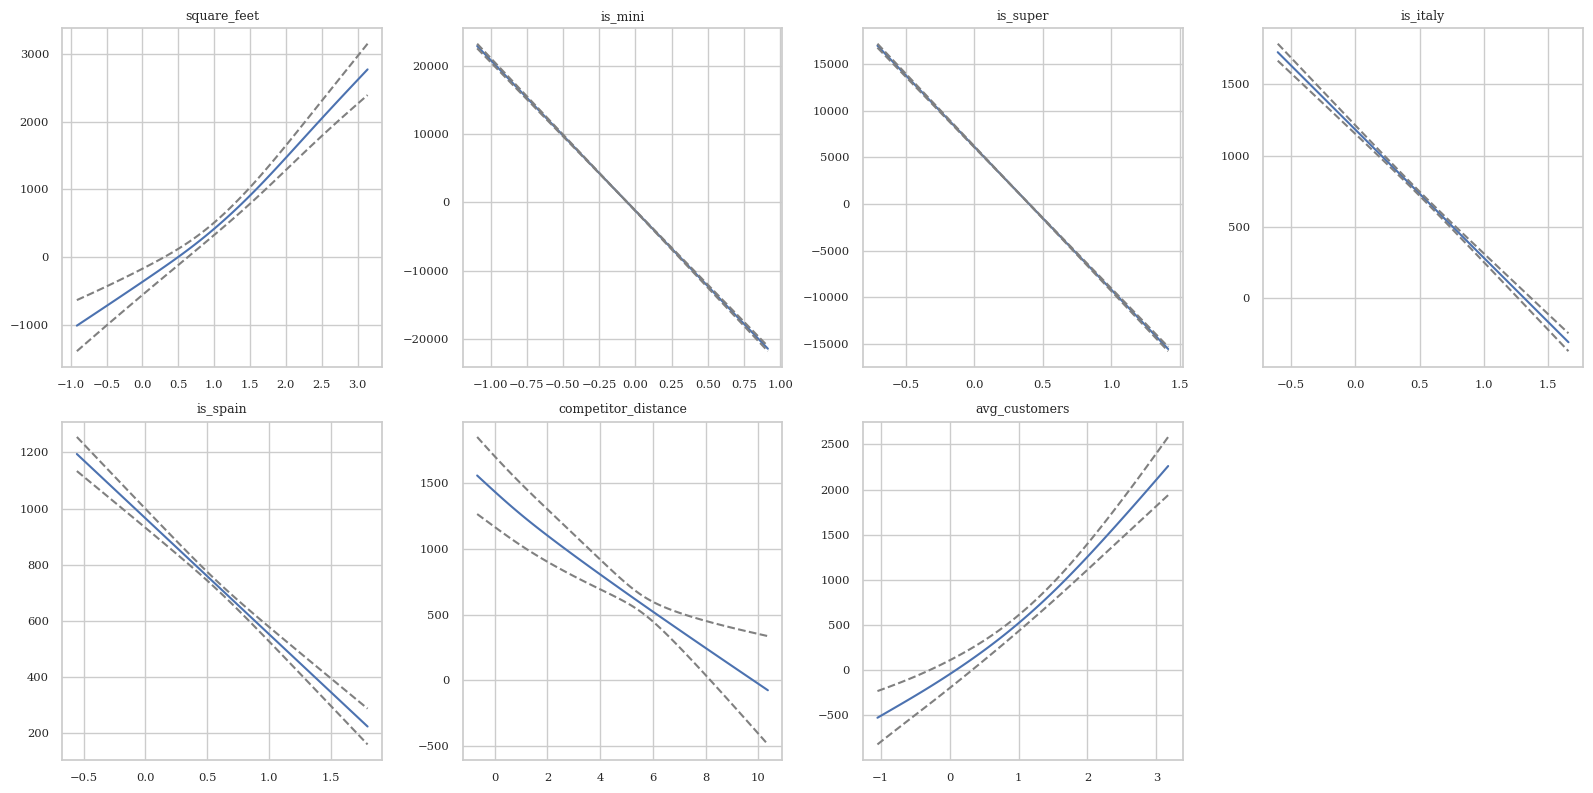

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 8))
index = 0
ax = ax.flatten()
for col_name in list(X.columns):
	XX = gam.generate_X_grid(term = index)
	sns.lineplot(x = XX[:, index], y = gam.partial_dependence(term = index, X = XX), ax = ax[index])
	sns.lineplot(x = XX[:, index], y = gam.partial_dependence(term = index, X = XX, width = .95)[1][:, 0], color = "gray", ls = "--", ax = ax[index])
	sns.lineplot(x = XX[:, index], y = gam.partial_dependence(term = index, X = XX, width = .95)[1][:, 1], color = "gray", ls = "--", ax = ax[index])
	ax[index].set_title(col_name)
	index = index + 1
ax[-1].axis("off")
plt.tight_layout()


## Decision tree (with pruning)

In [75]:
# initialize MSE and lambda
best_alpha = {
	"MSE": float("inf"),
	"alpha": float("inf")
}

# fit a decision tree with all data to derive the alpha values (for tree pruning)
tree = DecisionTreeRegressor(random_state = 2023)
tree.fit(X_scaled, y)
max_depth = tree.get_depth()

# different values of alpha
alphas = []
for node in tree.cost_complexity_pruning_path(X_scaled, y).impurities:
	alphas.append(max(0, node))

for alpha in alphas:

	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)
	
	# store mse
	mse_folds = 0

	# run k-fold cv
	for train_idx, validation_idx in kf.split(X_scaled):
		X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
		y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

		# fit
		pruned_tree = DecisionTreeRegressor(max_depth = 10, ccp_alpha = alpha, random_state = 2023)
		pruned_tree.fit(X_train, y_train)

		# predict
		y_pred = pruned_tree.predict(X_validation)
		# conversion of y_validation to np.array
		y_validation = np.array([element for sublist in y_validation.values for element in sublist])
		mse_folds = mse_folds + np.mean((y_validation - y_pred) ** 2)

	# cross-validation MSE
	estimated_test_error = mse_folds / number_folds

	# check if the estimated_test_error has decreased
	if estimated_test_error < best_alpha["MSE"]:
		best_alpha["MSE"] = estimated_test_error
		best_alpha["alpha"] = alpha

model_name = "decision tree (with pruning, alpha = " + str("{:.2e}".format(best_alpha["alpha"])) + ")"

cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": best_alpha["MSE"]}])])
cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression                              4.1357e+05
log linear regression                          4.5784e+03
poly regression (order = 1)                    4.1357e+05
poly regression (order = 2)                    4.9262e+03
poly regression (order = 3)                    7.6183e+03
poly regression (order = 4)                    5.1571e+05
regression spline (order = 1)                  4.8095e+03
regression spline (order = 2)                  6.2447e+03
regression spline (order = 3)                  6.6924e+04
log linear regression splines                  4.6058e+03
gam (lambda = 1000)                            4.0747e+05
decision tree (with pruning, alpha = 1.16e+01) 5.8145e+04

In [76]:
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

final_tree = DecisionTreeRegressor(ccp_alpha = best_alpha["alpha"], random_state = 2023)
final_tree.fit(X_scaled, y)

# tree structure as text
tree_rules = export_text(final_tree, feature_names = X_scaled.columns.tolist())
print("Decision Tree Rules:\n")
print(tree_rules)

# tree as a graph
dot_data = export_graphviz(final_tree, out_file = None, 
	feature_names = X_scaled.columns.tolist(),
	filled=True, rounded = True,
	special_characters = True)
graph = graphviz.Source(dot_data)

Decision Tree Rules:

|--- square_feet <= 1.01
|   |--- square_feet <= -0.34
|   |   |--- is_italy <= 0.53
|   |   |   |--- is_spain <= 0.62
|   |   |   |   |--- competitor_distance <= 1.51
|   |   |   |   |   |--- competitor_distance <= 0.47
|   |   |   |   |   |   |--- avg_customers <= -0.66
|   |   |   |   |   |   |   |--- avg_customers <= -0.89
|   |   |   |   |   |   |   |   |--- square_feet <= -0.85
|   |   |   |   |   |   |   |   |   |--- value: [12393.56]
|   |   |   |   |   |   |   |   |--- square_feet >  -0.85
|   |   |   |   |   |   |   |   |   |--- square_feet <= -0.72
|   |   |   |   |   |   |   |   |   |   |--- value: [12442.28]
|   |   |   |   |   |   |   |   |   |--- square_feet >  -0.72
|   |   |   |   |   |   |   |   |   |   |--- avg_customers <= -0.92
|   |   |   |   |   |   |   |   |   |   |   |--- value: [12467.74]
|   |   |   |   |   |   |   |   |   |   |--- avg_customers >  -0.92
|   |   |   |   |   |   |   |   |   |   |   |--- value: [12543.17]
|   |   |   |   |

## Random forests

In [77]:
# initialize MSE
best_params = {
	"MSE": float("inf"),
	"params": [-1, -1]
}

# initialize kfold object to use for model evaluation
number_folds = 5
kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)

# parameters setting: [n_estimators, min_samples_split]
list_parameters = [[100, 2], [500, 2], [1000, 2]]
for params in list_parameters:
	# store mse
	mse_folds = 0

	# run k-fold cv
	for train_idx, validation_idx in kf.split(X_scaled):
		X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
		y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

		# fit
		model = RandomForestRegressor(n_estimators = params[0], min_samples_split = params[1], max_features = "sqrt", random_state = 2023)
		y_train = np.array([element for sublist in y_train.values for element in sublist])
		model.fit(X_train, y_train)

		# predict
		y_pred = model.predict(X_validation)
		# conversion of y_validation to np.array
		y_validation = np.array([element for sublist in y_validation.values for element in sublist])
		mse_folds = mse_folds + np.mean((y_validation - y_pred) ** 2)

	# cross-validation MSE
	estimated_test_error = mse_folds / number_folds
	if estimated_test_error < best_params["MSE"]:
		best_params["MSE"] = estimated_test_error
		best_params["params"] = params

model_name = "random forests ([n_estimators, min_samples_split] = " + str(best_params["params"]) + ")"
cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": best_params["MSE"]}])])
cv_mse = cv_mse.rename(index = {0: model_name})
cv_mse

MSE
linear regression                                  4.1357e+05
log linear regression                              4.5784e+03
poly regression (order = 1)                        4.1357e+05
poly regression (order = 2)                        4.9262e+03
poly regression (order = 3)                        7.6183e+03
poly regression (order = 4)                        5.1571e+05
regression spline (order = 1)                      4.8095e+03
regression spline (order = 2)                      6.2447e+03
regression spline (order = 3)                      6.6924e+04
log linear regression splines                      4.6058e+03
gam (lambda = 1000)                                4.0747e+05
decision tree (with pruning, alpha = 1.16e+01)     5.8145e+04
random forests ([n_estimators, min_samples_spli... 2.8849e+05

## Gradient boosting

In [78]:
# initialize MSE and lambda
best_lmbd_gam = {
	"MSE": float("inf"),
	"lmbd": float("inf")
}

# different values of lambda (control smoothness)
for lmbd in [0.001, 0.01, 0.1, 0.5]:

	# initialize kfold object to use for model evaluation
	number_folds = 5
	kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)
	
	# store mse
	mse_folds = 0

	# run k-fold cv
	for train_idx, validation_idx in kf.split(X_scaled):
		X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
		y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

		# fit
		model = GradientBoostingRegressor(n_estimators = 1000, max_leaf_nodes = 32, learning_rate = lmbd, random_state = 2023)
		y_train = np.array([element for sublist in y_train.values for element in sublist])
		model.fit(X_train, y_train)

		# predict
		y_pred = model.predict(X_validation)
		# conversion of y_validation to np.array
		y_validation = np.array([element for sublist in y_validation.values for element in sublist])
		mse_folds = mse_folds + np.mean((y_validation - y_pred) ** 2)

	# cross-validation MSE
	estimated_test_error = mse_folds / number_folds

	# check if the estimated_test_error has decreased
	if estimated_test_error < best_lmbd_gam["MSE"]:
		best_lmbd_gam["MSE"] = estimated_test_error
		best_lmbd_gam["lmbd"] = lmbd

model_name = "gradient boosting (lambda = " + str(best_lmbd_gam["lmbd"]) + ")"

cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": best_lmbd_gam["MSE"]}])])
cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

MSE
linear regression                                  4.1357e+05
log linear regression                              4.5784e+03
poly regression (order = 1)                        4.1357e+05
poly regression (order = 2)                        4.9262e+03
poly regression (order = 3)                        7.6183e+03
poly regression (order = 4)                        5.1571e+05
regression spline (order = 1)                      4.8095e+03
regression spline (order = 2)                      6.2447e+03
regression spline (order = 3)                      6.6924e+04
log linear regression splines                      4.6058e+03
gam (lambda = 1000)                                4.0747e+05
decision tree (with pruning, alpha = 1.16e+01)     5.8145e+04
random forests ([n_estimators, min_samples_spli... 2.8849e+05
gradient boosting (lambda = 0.1)                   2.6866e+04

## Support vector machine (SVM)

In [85]:
parameters = {
    "C": np.linspace(1, 100, 10).tolist(), 
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"] + np.linspace(0.01, 1, 10).tolist(),
}

# set the parameters
svm = SVR()
grid_search = GridSearchCV(svm, parameters, cv=5)
y_np = np.array([element for sublist in y.values for element in sublist])
grid_search.fit(X_scaled, y_np)
best_params = grid_search.best_params_

# initialize kfold object to use for model evaluation
number_folds = 5
kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)

model_name = "svm ([C, gamma, ker] = " + str(list(best_params.values())) + ")"

# store mse
mse_folds = 0

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
	X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
	y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # fit 
	model = SVR(C = best_params["C"], kernel = best_params["kernel"], gamma = best_params["gamma"]) 
	y_train = np.array([element for sublist in y_train.values for element in sublist])
	model.fit(X_train, y_train)

	# predict
	y_pred = model.predict(X_validation)

	y_validation = np.array([element for sublist in y_validation.values for element in sublist])

	print(y_pred - y_validation)

	break

# 	mse_folds = mse_folds + ((y_validation - y_pred) ** 2).mean()

# # cross-validation MSE
# estimated_test_error = mse_folds / number_folds
# cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": estimated_test_error}])])
# cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

[-2.21901807e+00 -1.89024734e+01  2.12862184e+03 -5.98359868e+02
 -1.01430835e+02 -3.83518716e+04  8.58127663e+01  1.36996595e+03
  5.25344811e+01  1.31442341e+03  3.48542149e+03  1.26943309e+02
  3.43144375e+01  1.46667707e+03  1.38726183e+03 -5.45603066e+02
  1.35351272e+03  1.37653906e+03 -4.62772391e+02  1.71725217e+02
  1.70877626e+03 -1.87287922e+02  1.61101393e+02  1.38952613e+03
 -1.00208714e+03 -3.76299807e+01 -1.15253943e+02  3.61483606e+03
 -3.34907187e+04  8.88779685e+01  1.28618741e+03 -3.95627749e+04
 -1.52317271e+02 -1.96824379e+02 -3.74563848e+04  1.23618271e+03
 -5.22674656e+01 -3.63457499e+04  3.47576117e+03 -9.35728621e+02
 -2.29190533e+03  4.16046105e+02 -2.69248063e+00  1.34065716e+03
  1.95658531e+02 -8.37603367e+01  1.23904319e+02  1.22878847e+01
  6.53254918e+01  1.45101359e+03 -1.00540776e+01  5.38537227e+01
  8.66526337e+01 -5.12481255e+01 -1.35484168e+02 -3.71586940e+04
 -3.46895118e+04 -4.06624724e+02  2.60377231e+01  1.34068051e+03
  8.42792227e+01  1.46507

MSE
linear regression                                  4.1357e+05
log linear regression                              4.5784e+03
poly regression (order = 1)                        4.1357e+05
poly regression (order = 2)                        4.9262e+03
poly regression (order = 3)                        7.6183e+03
poly regression (order = 4)                        5.1571e+05
regression spline (order = 1)                      4.8095e+03
regression spline (order = 2)                      6.2447e+03
regression spline (order = 3)                      6.6924e+04
log linear regression splines                      4.6058e+03
gam (lambda = 1000)                                4.0747e+05
decision tree (with pruning, alpha = 1.16e+01)     5.8145e+04
random forests ([n_estimators, min_samples_spli... 2.8849e+05
gradient boosting (lambda = 0.1)                   2.6866e+04
svm ([C, gamma, ker] = [100.0, 0.12, 'rbf'])       1.6248e+08
nn (2hidden layers, ReLU)                          8.7080e+03

## Neural Network (NN)

In [80]:
# set device (gpu or cpu)
gpu_flag = False
if gpu_flag:
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
	print("using device " + str(device) + ": ", end = "")
	if device.type == "cuda":
		print(torch.cuda.get_device_name(0), end = "")
		print(" (cuda version " + torch.version.cuda + ")")
else:
	device = torch.device("cpu")
	print("using device " + str(device))

using device cpu


fold 1
	epoch [20/200]	/ (training) loss: 3354.8117675781
	epoch [40/200]	/ (training) loss: 2459.5344238281
	epoch [60/200]	/ (training) loss: 2664.7983398438
	epoch [80/200]	/ (training) loss: 2852.9516601562
	epoch [100/200]	/ (training) loss: 3049.6689453125
	epoch [120/200]	/ (training) loss: 3064.6362304688
	epoch [140/200]	/ (training) loss: 3100.3659667969
	epoch [160/200]	/ (training) loss: 3136.5378417969
	epoch [180/200]	/ (training) loss: 3256.6396484375
	epoch [200/200]	/ (training) loss: 3044.6306152344
fold 2
	epoch [20/200]	/ (training) loss: 2350.5366210938
	epoch [40/200]	/ (training) loss: 787.7608642578
	epoch [60/200]	/ (training) loss: 513.3572998047
	epoch [80/200]	/ (training) loss: 555.6564331055
	epoch [100/200]	/ (training) loss: 692.8139648438
	epoch [120/200]	/ (training) loss: 823.5423583984
	epoch [140/200]	/ (training) loss: 966.1511840820
	epoch [160/200]	/ (training) loss: 1083.6156005859
	epoch [180/200]	/ (training) loss: 1316.2822265625
	epoch [200/

MSE
linear regression                                  4.1357e+05
log linear regression                              4.5784e+03
poly regression (order = 1)                        4.1357e+05
poly regression (order = 2)                        4.9262e+03
poly regression (order = 3)                        7.6183e+03
poly regression (order = 4)                        5.1571e+05
regression spline (order = 1)                      4.8095e+03
regression spline (order = 2)                      6.2447e+03
regression spline (order = 3)                      6.6924e+04
log linear regression splines                      4.6058e+03
gam (lambda = 1000)                                4.0747e+05
decision tree (with pruning, alpha = 1.16e+01)     5.8145e+04
random forests ([n_estimators, min_samples_spli... 2.8849e+05
gradient boosting (lambda = 0.1)                   2.6866e+04
svm ([C, gamma, ker] = [100.0, 0.12, 'rbf'])       1.6248e+08
nn (2hidden layers, ReLU)                          8.7080e+03

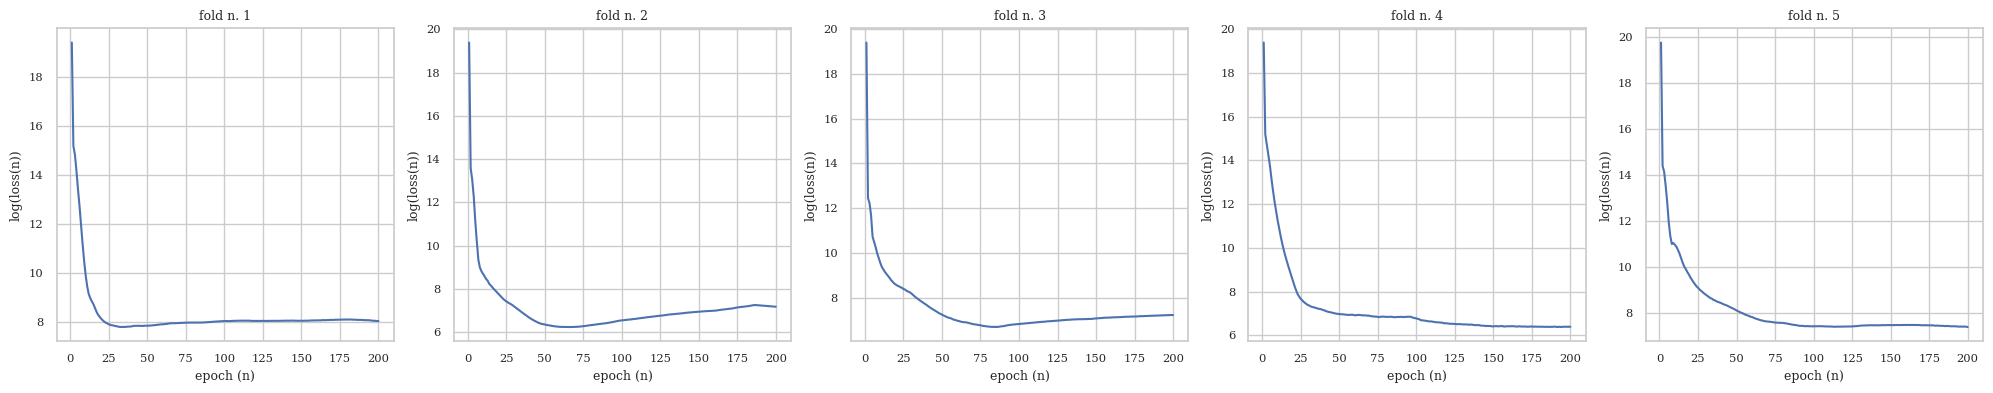

In [81]:
torch.manual_seed(2023)

# predictors = X_scaled_nn, target = y_nn
X = merged_df[['square_feet', 'is_mini', 'is_super', 'is_italy', 'is_spain', 'competitor_distance', 'avg_customers']]
X_scaled_nn = scaler.fit_transform(X)
y_nn = y.to_numpy().reshape(-1, 1)

# model
input_size = X_train.shape[1]
hidden_sizes = [100, 100]
output_size = 1
def nn_model(input_size, hidden_sizes, output_size):
	layers = []
	for i in range(len(hidden_sizes)):
		if i == 0:
			layers.append(nn.Linear(input_size, hidden_sizes[i]))
		else:
			layers.append(nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
		layers.append(nn.ReLU())
	layers.append(nn.Linear(hidden_sizes[-1], output_size))
	return nn.Sequential(*layers)

# learning parameters
learning_rate = 0.0000001
num_epochs = 200
batch_size = 5
# loss
criterion = nn.MSELoss()

# initialize kfold object to use for model evaluation
number_folds = 5
kf = KFold(n_splits = number_folds, shuffle = True, random_state = 2023)

model_name = "nn (" + str(len(hidden_sizes)) + "hidden layers, ReLU)"

# store mse
mse_folds = 0

# run k-fold cv
fold_counter = 0
_, ax = plt.subplots(ncols = 5, nrows = 1, figsize = (20, 4))
ax = ax.flatten()

for train_idx, validation_idx in kf.split(X_scaled_nn):
	fold_counter = fold_counter + 1
	print("fold " + str(fold_counter))
	X_train, X_validation = X_scaled_nn[train_idx, :], X_scaled_nn[validation_idx, :]
	y_train, y_validation = y_nn[train_idx], y_nn[validation_idx]
	X_train_tensor, X_val_tensor = torch.FloatTensor(X_train).to(device), torch.FloatTensor(X_validation).to(device)
	y_train_tensor, y_val_tensor = torch.FloatTensor(y_train).to(device), torch.FloatTensor(y_validation).to(device)
	
	# model
	model = nn_model(input_size, hidden_sizes, output_size)
	model = model.to(device)
	# optimizer
	optimizer = optim.SGD(model.parameters(), lr = learning_rate)

	cv_losses = []
	# fit (during epochs)
	for epoch in range(num_epochs):
		for batch_start in range(0, X_train_tensor.size(0), batch_size):
			# get batch
			X_batch = X_train_tensor[batch_start:(batch_start + batch_size)]
			y_batch = y_train_tensor[batch_start:(batch_start + batch_size)]
			# forward pass
			outputs = model.forward(X_batch)
			loss = criterion(outputs, y_batch)
			# backward pass and optimization (gradient descent)
			optimizer.zero_grad() 
			loss.backward()
			optimizer.step()
		# loading (every 10 epochs)
		if (epoch + 1) % 20 == 0:
			print("\tepoch [" + str(epoch + 1) + "/" + str(num_epochs) + "]\t/ (training) loss:", "{:.10f}".format(loss.item()))
		cv_losses.append(loss.item())

	# plot loss
	sns.lineplot(x = range(1, num_epochs + 1), y = np.log(cv_losses), ax = ax[fold_counter - 1])
	ax[fold_counter - 1].set_title("fold n. " + str(fold_counter))
	ax[fold_counter - 1].set_xlabel("epoch (n)")
	ax[fold_counter - 1].set_ylabel("log(loss(n))")

	# predict
	with torch.no_grad():
		model.eval()
		y_pred = model.forward(X_val_tensor)
		valid_loss = criterion(y_pred, y_val_tensor)
		mse_folds = mse_folds + valid_loss.item()

plt.tight_layout()

# cross-validation MSE
estimated_test_error = mse_folds / number_folds
cv_mse = pd.concat([cv_mse, pd.DataFrame([{"MSE": estimated_test_error}])])
cv_mse = cv_mse.rename(index = {0: model_name})

cv_mse

## Solution

In [82]:
options_mini = pd.DataFrame(
	np.array([
		[1850, 1, 0, 0, 1, 4500, 190], 
		[2100, 1, 0, 0, 0, 12850, 215], 
		[1920, 1, 0, 1, 0, 1450, 220]]), 
	columns = ['square_feet', 'is_mini', 'is_super', 'is_italy', 'is_spain', 'competitor_distance', 'avg_customers'])

options_super = pd.DataFrame(
	np.array([
		[5580, 0, 1, 0, 1, 580, 420], 
		[5120, 0, 1, 0, 0, 2560, 390], 
		[4970, 0, 1, 1, 0, 3520, 410]]), 
	columns = ['square_feet', 'is_mini', 'is_super', 'is_italy', 'is_spain', 'competitor_distance', 'avg_customers'])

options_hyper = pd.DataFrame(
	np.array([
		[10560, 0, 0, 0, 1, 8940, 860], 
		[12570, 0, 0, 0, 0, 7580, 880], 
		[11980, 0, 0, 1, 0, 11560, 790]]), 
	columns = ['square_feet', 'is_mini', 'is_super', 'is_italy', 'is_spain', 'competitor_distance', 'avg_customers'])

display(options_mini)
display(options_super)
display(options_hyper)

square_feet  is_mini  is_super  is_italy  is_spain  competitor_distance  \
0         1850        1         0         0         1                 4500   
1         2100        1         0         0         0                12850   
2         1920        1         0         1         0                 1450   

   avg_customers  
0            190  
1            215  
2            220

square_feet  is_mini  is_super  is_italy  is_spain  competitor_distance  \
0         5580        0         1         0         1                  580   
1         5120        0         1         0         0                 2560   
2         4970        0         1         1         0                 3520   

   avg_customers  
0            420  
1            390  
2            410

square_feet  is_mini  is_super  is_italy  is_spain  competitor_distance  \
0        10560        0         0         0         1                 8940   
1        12570        0         0         0         0                 7580   
2        11980        0         0         1         0                11560   

   avg_customers  
0            860  
1            880  
2            790